In [411]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os

In [412]:
pwd = os.getcwd()
filepath = pwd + "\\skater_stats.csv"
data = pd.read_csv(filepath,encoding='latin-1')

C:\Users\krist\AppData\Local\Temp\ipykernel_14236\4019381976.py:3: DtypeWarning: Columns (8,9,11,29,48,49,55,56,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath,encoding='latin-1')


In [413]:
# Shape of the current dataset.
data.shape

(71251, 90)

In [414]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [415]:
# Displaying top 5 results by index.
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,1918,REG,adamsja01,Jack Adams,True,23,TRA,Toronto Arenas,False,False,C,NaN,8.0,0,0,0,NaN,31.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,3.88,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,0.2,NaN,NaN,NaN,NaN
1,1918,REG,bellbi01,Billy Bell,False,26,TOT,Total,False,True,F,NaN,9.0,1,0,1,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.11,0.00,0.11,0.10,0.67,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
2,1918,REG,bellbi01,Billy Bell,False,26,MTL,Montreal Canadiens,True,False,F,NaN,7.0,0,0,0,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.86,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
3,1918,REG,bellbi01,Billy Bell,False,26,MTW,Montreal Wanderers,True,False,F,NaN,2.0,1,0,1,NaN,0.0,0.1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.50,0.00,0.50,0.45,0.00,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.1,NaN,NaN,NaN,NaN
4,1918,REG,berlilo01,Louis Berlinguette,False,30,MTL,Montreal Canadiens,False,False,LW,NaN,20.0,2,1,3,NaN,12.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.10,0.05,0.15,0.11,0.60,NaN,2.0,5.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,0.8,NaN,NaN,NaN,NaN


In [416]:
# In this analysis I´m mostly interested in regular season games played between seasons 2015-2022 with minimum 20 games played per player.
data = data[(data["Season"] >= 2015) & (data["Game_Type"] == "REG")]

In [417]:
data = data.reset_index(drop=True)

In [418]:
data.iloc[:7,:10]

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag
0,2015,REG,abdelju01,Justin Abdelkader,False,27,DET,Detroit Red Wings,False,False
1,2015,REG,actonwi01,Will Acton,False,27,EDM,Edmonton Oilers,False,False
2,2015,REG,adamlu01,Luke Adam,False,24,CBJ,Columbus Blue Jackets,False,False
3,2015,REG,adamscr01,Craig Adams,False,37,PIT,Pittsburgh Penguins,False,False
4,2015,REG,agozzan01,Andrew Agozzino,False,24,COL,Colorado Avalanche,False,False
5,2015,REG,akesoja01,Jason Akeson,False,24,PHI,Philadelphia Flyers,False,False
6,2015,REG,allenbr01,Bryan Allen,False,34,TOT,Total,False,True


In [419]:
# Displaying columns of the dataset.
data.columns

Index(['Season', 'Game_Type', 'Player_ID', 'Player_Name', 'Hof', 'Age',
       'Team_ID', 'Team_Name', 'Team_Bkdwn_Flag', 'Seas_Sum_Flag', 'Pos1',
       'Pos2', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'S_Pct', 'TOI', 'Avg_TOI',
       'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'esCF', 'esCA', 'esCF_Pct',
       'esRelCF_Pct', 'esFF', 'esFA', 'esFF_Pct', 'esRelFF_Pct', 'oiSH_Pct',
       'oiSV_Pct', 'PDO', 'oZS_Pct', 'dZS_Pct', 'TOI_per60', 'esTOI_per60',
       'TK', 'GV', 'xPlusMinus', 'TSA', 'SAThruToNet_Pct',
       'Avg_ShiftLength_perGm', 'esTOI_perGm', 'esGF_per60', 'esGA_per60',
       'ppTOI_perGm', 'ppRelCF_Pct', 'ppGF_per60', 'ppGA_per60', 'shTOI_perGm',
       'shRelCF_Pct', 'shGF_per60', 'shGA_per60', 'GC', 'G_perGm', 'A_perGm',
       'PTS_perGm', 'GC_perGm', 'PIM_perGm', 'S_perGm', 'adjG', 'adjA',
       'adjPTS', 'adjGC', 'oiTGF', 'oiPPGF', 'oiTGA', 'oiPKGA', 'xGF', 'xGA',
       'OPS', 'DPS', 'soAtt', 'so

In [420]:
# Sorting the columns I´m interested in.
data = data[['Season','Player_Name','Age',
       'Team_ID', 'Team_Name','Pos1','GP', 'G', 'A', 'PTS', 'PIM','PS', 'PlusMinus', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'TOI', 'Avg_TOI','BLK', 'HIT',  'FOW', 'FOL','xGF', 'xGA',]]

In [421]:
# Changing the name of column Pos1 to Pos (as Position).
data.rename(columns={"Pos1":"Pos"}, inplace=True)

In [422]:
# Checking for null values.
data.isna().sum()

Season          0
Player_Name     0
Age             0
Team_ID         0
Team_Name      35
Pos             0
GP              0
G               0
A               0
PTS             0
PIM             0
PS              0
PlusMinus       0
esG             0
ppG             0
shG             0
GWG             0
esA             0
ppA             0
shA             0
S               0
TOI             0
Avg_TOI         0
BLK             3
HIT             0
FOW             3
FOL             3
xGF             3
xGA             3
dtype: int64

In [423]:
# Checking which Team_Name has null values.
data["Team_ID"][data["Team_Name"].isna()].unique()

array(['SEA'], dtype=object)

In [424]:
# Assigning Team_Name based on Team_ID.
data["Team_Name"].fillna("Seattle Kraken", inplace=True)

In [425]:
print("Dataset shape = {}\n".format(data.shape))
data.info()

Dataset shape = (8419, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8419 entries, 0 to 8418
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       8419 non-null   int64  
 1   Player_Name  8419 non-null   object 
 2   Age          8419 non-null   int64  
 3   Team_ID      8419 non-null   object 
 4   Team_Name    8419 non-null   object 
 5   Pos          8419 non-null   object 
 6   GP           8419 non-null   float64
 7   G            8419 non-null   int64  
 8   A            8419 non-null   int64  
 9   PTS          8419 non-null   int64  
 10  PIM          8419 non-null   float64
 11  PS           8419 non-null   float64
 12  PlusMinus    8419 non-null   float64
 13  esG          8419 non-null   float64
 14  ppG          8419 non-null   float64
 15  shG          8419 non-null   float64
 16  GWG          8419 non-null   float64
 17  esA          8419 non-null   float64
 18  ppA          8419 no

In [426]:
# Basic descriptive statistics of the numeric columns.
data.describe()

,Season,Age,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,xGF,xGA
count,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8416.000000,8419.000000,8416.000000,8416.000000,8416.000000,8416.000000
mean,2018.548046,26.389001,44.118898,6.908897,11.613493,18.522390,21.211070,2.181233,-0.625134,5.326048,1.391377,0.191472,1.088490,8.766124,2.646870,0.200499,74.680366,722.694857,34.146863,55.696282,70.945461,71.021269,24.495307,24.495722
std,2.313598,4.240470,27.870811,8.418767,12.613007,19.845371,21.933223,2.621983,9.673298,6.168286,2.674408,0.573981,1.689523,8.612017,4.763461,0.530106,66.590814,542.078857,36.902812,52.289425,164.528039,154.059963,19.151930,18.170895
min,2015.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,-47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,23.000000,16.000000,1.000000,2.000000,3.000000,4.000000,0.100000,-5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,17.000000,203.000000,7.000000,15.000000,0.000000,0.000000,6.400000,7.100000
50%,2019.000000,26.000000,49.000000,4.000000,7.000000,12.000000,16.000000,1.200000,-1.000000,3.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,60.000000,689.000000,23.000000,42.000000,1.000000,3.000000,22.000000,23.300000
75%,2021.000000,29.000000,70.000000,10.000000,17.000000,28.000000,31.000000,3.500000,3.000000,8.000000,2.000000,0.000000,2.000000,14.000000,3.000000,0.000000,115.000000,1165.000000,45.000000,81.000000,32.000000,39.000000,39.300000,38.800000
max,2022.000000,45.000000,84.000000,60.000000,87.000000,128.000000,238.000000,15.300000,64.000000,44.000000,26.000000,7.000000,12.000000,56.000000,34.000000,6.000000,398.000000,2378.000000,283.000000,382.000000,1273.000000,935.000000,86.800000,82.200000


In [427]:
# Checking unique values in column Games played. Regular season in NHL has 82 games, this dataset has players that played more than that.
data["GP"].unique()

array([71.,  3., 70.,  1., 13., 11.,  6.,  5.,  4., 82., 68., 18., 12.,
       52., 77., 36., 27., 10.,  7., 78.,  2., 31., 80., 15., 14., 47.,
       37., 62., 64., 65., 49., 81., 73., 59., 56., 39., 17., 67.,  9.,
       60., 72., 45., 41., 21., 53., 75., 63., 51., 38., 29., 69., 30.,
        8., 44., 57., 20., 33., 19., 16., 40., 76., 61., 58., 74., 24.,
       43., 54., 55., 50., 32., 23., 35., 79., 42., 26., 66., 34., 25.,
       48., 46., 22., 28., 84., 83.])

In [428]:
# Looking for players that played more than 82 games, the problem was with players that were traded during the regular season and their stats from multiple teams were summed together in a new row.
data[data["GP"] > 82]

,Season,Player_Name,Age,Team_ID,Team_Name,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA
1031,2015,Keith Yandle,28,TOT,Total,D,84.0,6,46,52,40.0,6.6,-26.0,4.0,2.0,0.0,2.0,19.0,27.0,0.0,232.0,1925.0,22:55,101.0,53.0,0.0,0.0,59.2,70.1
1038,2015,Marek Zidlicky,37,TOT,Total,D,84.0,7,27,34,56.0,6.0,-9.0,1.0,6.0,0.0,1.0,13.0,14.0,0.0,130.0,1760.0,20:57,92.0,95.0,0.0,1.0,54.1,60.8
1636,2016,Jamie McGinn,27,TOT,Total,LW,84.0,22,17,39,33.0,5.0,-7.0,13.0,9.0,0.0,5.0,14.0,3.0,0.0,156.0,1201.0,14:18,27.0,164.0,4.0,3.0,34.7,33.9
1930,2016,Eric Staal,31,TOT,Total,C,83.0,13,26,39,34.0,3.4,-3.0,12.0,1.0,0.0,0.0,20.0,6.0,0.0,199.0,1540.0,18:33,33.0,74.0,446.0,396.0,58.7,46.5
4436,2019,Kevin Fiala,22,TOT,Total,LW,83.0,13,26,39,36.0,2.4,-23.0,11.0,2.0,0.0,2.0,17.0,9.0,0.0,174.0,1298.0,15:38,20.0,42.0,3.0,5.0,49.6,52.2
4551,2019,Ryan Hartman,24,TOT,Total,RW,83.0,12,14,26,74.0,2.1,1.0,12.0,0.0,0.0,2.0,14.0,0.0,0.0,145.0,1089.0,13:07,39.0,107.0,4.0,12.0,41.6,48.7
4919,2019,Marcus Pettersson,22,TOT,Total,D,84.0,2,23,25,66.0,5.0,17.0,1.0,1.0,0.0,0.0,18.0,4.0,1.0,87.0,1401.0,16:41,108.0,101.0,1.0,0.0,52.6,48.0


In [429]:
# Team_ID with value TOT means Season Total for players that were traded during the season. I want to delete those rows as we have their separate stats in other rows for that particular season.
data = data[data["Team_ID"] != "TOT"]

In [430]:
data.fillna(0,inplace=True)

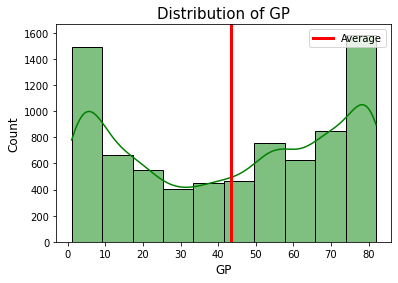

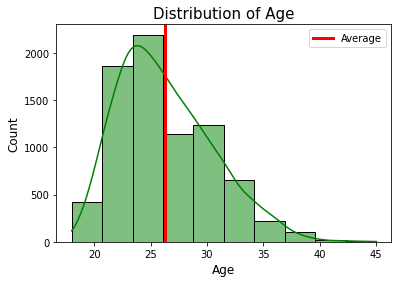

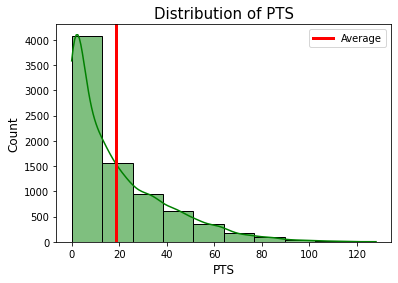

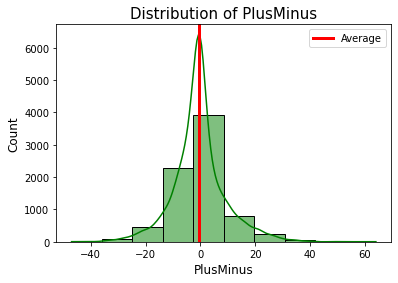

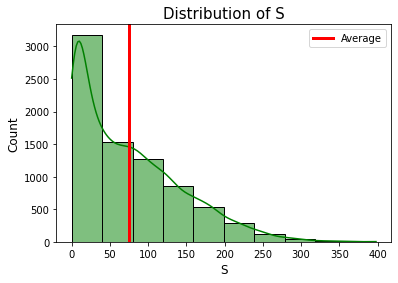

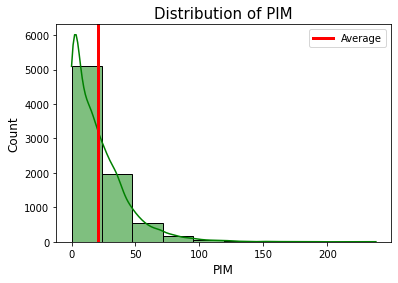

In [431]:
# Looking at the distribution of the dataset.
xd = ["GP","Age","PTS","PlusMinus","S","PIM"]
for i in xd:
    sns.histplot(x=i, data=data, color="g", kde=True, bins=10)
    plt.title("Distribution of " + i, fontsize=15)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.axvline(data[i].mean(), linewidth=3, c="r", label="Average")
    plt.legend()
    plt.show()

In [432]:
# Quick stats of the last 7 seasons.
print("Most goals scored during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"G":"sum"}).sort_values(by="G", ascending=False).head(1), "\n")
print("Most game-winning goals scored during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"GWG":"sum"}).sort_values(by="GWG", ascending=False).head(1), "\n")
print("Most assists during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"A":"sum"}).sort_values(by="A", ascending=False).head(1), "\n")
print("Most points during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).head(1), "\n")
print("Most shots during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"S":"sum"}).sort_values(by="S", ascending=False).head(1), "\n")
print("Most hits during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"HIT":"sum"}).sort_values(by="HIT", ascending=False).head(1), "\n")
print("Most penalty minutes during the last 7 seasons: ", data.groupby(["Player_Name",]).agg({"PIM":"sum"}).sort_values(by="PIM", ascending=False).head(1), "\n")
print("Most blocked shots during the last 7 seasons : ", data.groupby(["Player_Name",]).agg({"BLK":"sum"}).sort_values(by="BLK", ascending=False).head(1), "\n")
print("Most minutes played during the last 7 seasons : ", data.groupby(["Player_Name"]).agg({"TOI":"sum"}).sort_values(by="TOI", ascending=False).head(1), "\n")
print("Most faceoffs won during the last 7 seasons : ", data.groupby(["Player_Name"]).agg({"FOW":"sum"}).sort_values(by="FOW", ascending=False).head(1), "\n")
print("Oldest player to play during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"Age":"max"}).sort_values(by="Age", ascending=False).head(1), "\n")
print("Most games played during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"GP":"sum"}).sort_values(by="GP", ascending=False).head(1), "\n")
print("Best Plus-Minus player during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"PlusMinus":"max"}).sort_values(by="PlusMinus", ascending=False).head(1), "\n")


Most goals scored during the last 7 seasons:                   G
Player_Name       
Alex Ovechkin  358 

Most game-winning goals scored during the last 7 seasons:                   GWG
Player_Name         
Connor McDavid  53.0 

Most assists during the last 7 seasons:                    A
Player_Name        
Connor McDavid  458 

Most points during the last 7 seasons:                  PTS
Player_Name        
Connor McDavid  697 

Most shots during the last 7 seasons:                      S
Player_Name          
Alex Ovechkin  2626.0 

Most hits during the last 7 seasons:                  HIT
Player_Name        
Matt Martin  2127.0 

Most penalty minutes during the last 7 seasons:                  PIM
Player_Name        
Tom Wilson   1070.0 

Most blocked shots during the last 7 seasons :                   BLK
Player_Name         
Kris Russell  1358.0 

Most minutes played during the last 7 seasons :                   TOI
Player_Name         
Ryan Suter   15951.0 

Most faceoffs won dur

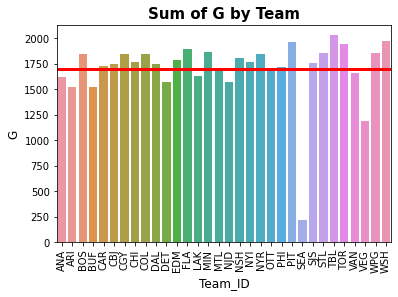

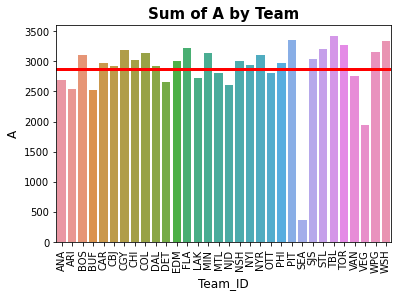

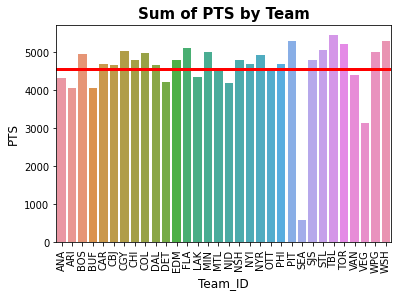

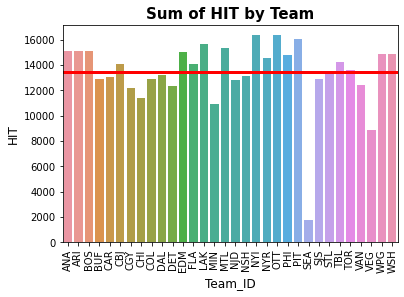

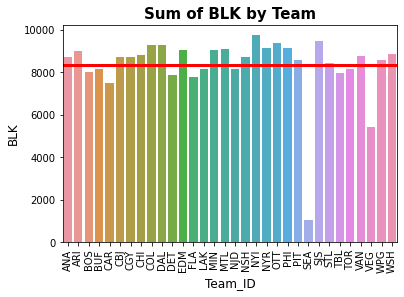

In [433]:
# Sum of Goals, Hits and Penalty minutes per team during the last 7 seasons.
cols = ["G", "A", "PTS", "HIT","BLK"]
for s in cols:
    sns.barplot(x="Team_ID", y=s, data=data.sort_values(by="Team_ID"), estimator=sum, ci=False)
    plt.title("Sum of " + s + " by Team", fontsize=15, fontweight="bold")
    plt.xlabel("Team_ID", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.axhline(data[s].sum()/(len(data["Team_ID"].unique())),0,1, c="red", linewidth=3)
    plt.xticks(rotation=90)
    plt.show()

In [434]:
# Top 5/Bottom 5 teams per Goals, Hits and Blocked shots.
cols = ["G","A","PTS","HIT","BLK"]
for s in cols:
    print("Most " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=False).head(5), "\n")
    print("Least " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=True).head(5), "\n")

Most G overall:
            G
Team_ID      
TBL      2030
WSH      1970
PIT      1960
TOR      1939
FLA      1897 

Least G overall:
            G
Team_ID      
SEA       213
VEG      1190
ARI      1525
BUF      1526
DET      1568 

Most A overall:
            A
Team_ID      
TBL      3422
PIT      3346
WSH      3329
TOR      3275
FLA      3218 

Least A overall:
            A
Team_ID      
SEA       367
VEG      1942
BUF      2527
ARI      2540
NJD      2612 

Most PTS overall:
          PTS
Team_ID      
TBL      5452
PIT      5306
WSH      5299
TOR      5214
FLA      5115 

Least PTS overall:
          PTS
Team_ID      
SEA       580
VEG      3132
BUF      4053
ARI      4065
NJD      4187 

Most HIT overall:
             HIT
Team_ID         
NYI      16357.0
OTT      16340.0
PIT      16041.0
LAK      15641.0
MTL      15335.0 

Least HIT overall:
             HIT
Team_ID         
SEA       1770.0
VEG       8837.0
MIN      10917.0
CHI      11423.0
CGY      12212.0 

Most BLK overall:


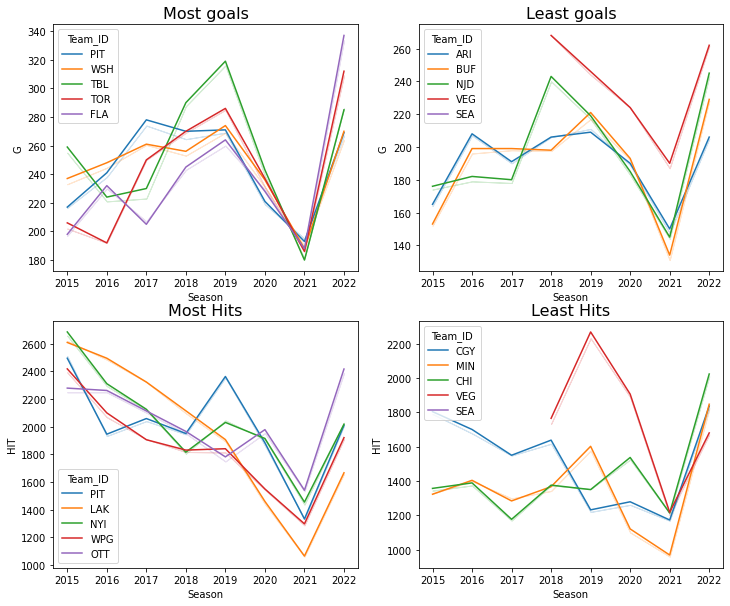

In [435]:
# Displaying some of the achieved stats using subplot.
fig, axes = plt.subplots(2,2, figsize=(12,10))
ax1 = sns.lineplot(x="Season", y="G", data=data[data["Team_ID"].isin(["TBL","WSH","TOR","PIT","FLA"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[0,0])
ax1.set_title("Most goals", fontsize=16)
ax2 = sns.lineplot(x="Season", y="G", data=data[data["Team_ID"].isin(["SEA", "VEG","ARI","BUF","NJD"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[0,1])
ax2.set_title("Least goals", fontsize=16)
ax3 = sns.lineplot(x="Season", y="HIT", data=data[data["Team_ID"].isin(["NYI","OTT","LAK","PIT","WPG"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[1,0])
ax3.set_title("Most Hits", fontsize=16)
ax4 = sns.lineplot(x="Season", y="HIT", data=data[data["Team_ID"].isin(["SEA","VEG","MIN","CHI","CGY"])], hue="Team_ID", ci=False, estimator=sum,ax=axes[1,1])
ax4.set_title("Least Hits", fontsize=16)
plt.show()

In [436]:
# Top 5 players in their respective best season in Goals scored, Assists, Total Points, Hits, and Blocks.
cols = ["G","A","PTS","HIT","BLK", "TOI", "S"]
for s in cols:
    print("Most " + s + " in one season:")
    print(data.groupby(["Player_Name", "Season"]).agg({s:"max"}).sort_values(by=s, ascending=False).head(6), "\n")

Most G in one season:
                         G
Player_Name     Season    
Auston Matthews 2022    60
Leon Draisaitl  2022    55
Alex Ovechkin   2015    53
Chris Kreider   2022    52
Alex Ovechkin   2019    51
                2022    50 

Most A in one season:
                            A
Player_Name        Season    
Nikita Kucherov    2019    87
Jonathan Huberdeau 2022    85
Connor McDavid     2022    79
Johnny Gaudreau    2022    75
Connor McDavid     2019    75
Artemi Panarin     2022    74 

Most PTS in one season:
                           PTS
Player_Name        Season     
Nikita Kucherov    2019    128
Connor McDavid     2022    123
                   2019    116
Johnny Gaudreau    2022    115
Jonathan Huberdeau 2022    115
Leon Draisaitl     2022    110 

Most HIT in one season:
                          HIT
Player_Name     Season       
Matt Martin     2015    382.0
                2016    365.0
Mark Borowiecki 2017    364.0
Radko Gudas     2022    355.0
Cal Clutterbuck 20

In [437]:
seasonleaders = data[["Player_Name","Team_ID","Pos","Season", "GP","PTS"]]
seasonleaders = seasonleaders.sort_values(by="PTS", ascending=False).drop_duplicates(["Season"]).sort_values(by="Season").reset_index(drop=True)
seasonleaders["PointsPerGame"] = seasonleaders["PTS"]/seasonleaders["GP"]
print(seasonleaders["Player_Name"].value_counts(),"\n")
print(seasonleaders["Pos"].value_counts())
seasonleaders


Connor McDavid     4
Jamie Benn         1
Patrick Kane       1
Nikita Kucherov    1
Leon Draisaitl     1
Name: Player_Name, dtype: int64 

C     5
RW    2
LW    1
Name: Pos, dtype: int64


,Player_Name,Team_ID,Pos,Season,GP,PTS,PointsPerGame
0,Jamie Benn,DAL,LW,2015,82.0,87,1.060976
1,Patrick Kane,CHI,RW,2016,82.0,106,1.292683
2,Connor McDavid,EDM,C,2017,82.0,100,1.219512
3,Connor McDavid,EDM,C,2018,82.0,108,1.317073
4,Nikita Kucherov,TBL,RW,2019,82.0,128,1.560976
5,Leon Draisaitl,EDM,C,2020,71.0,110,1.549296
6,Connor McDavid,EDM,C,2021,56.0,105,1.875000
7,Connor McDavid,EDM,C,2022,80.0,123,1.537500


In [438]:
data1 = data[["Player_Name","Team_ID","Season","PTS"]]

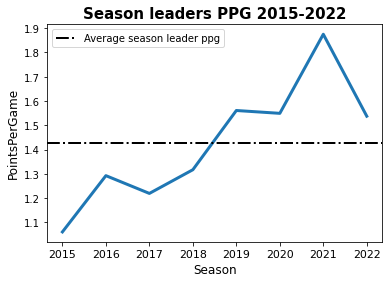

In [439]:
sns.lineplot(x="Season", y="PointsPerGame", data=seasonleaders, ci=False,linewidth=3)
plt.title("Season leaders PPG 2015-2022", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.xticks(fontsize=11)
plt.axhline(seasonleaders["PointsPerGame"].mean(),0,1,linewidth=2, c="black", linestyle="-.", label="Average season leader ppg")
plt.legend()
plt.show()

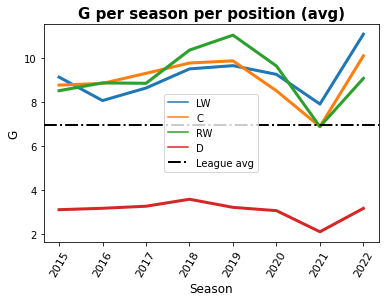

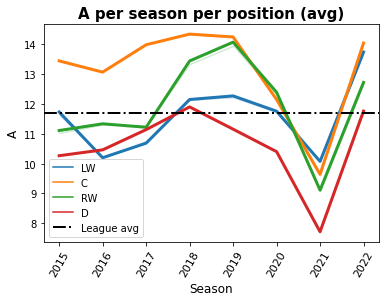

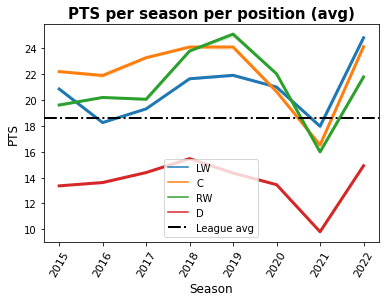

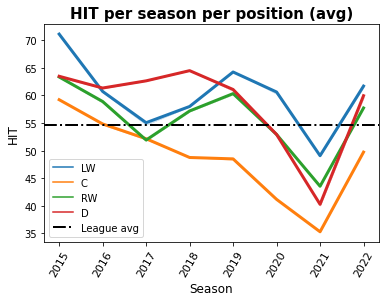

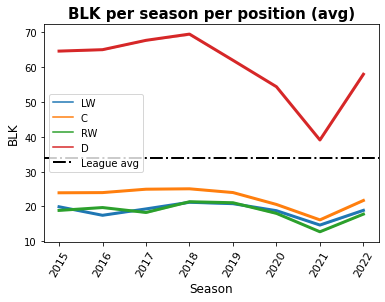

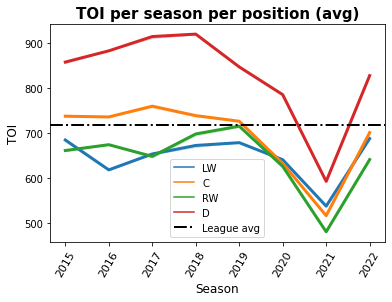

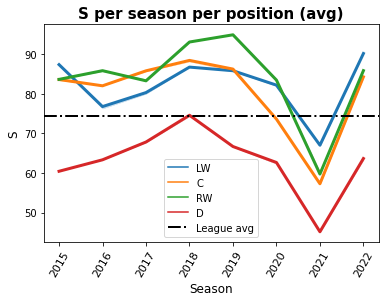

In [440]:
# Displaying Average Goals scored, Hits and Blocked shots per position (LW, RW, C, D) with overall Average across all positions.
for s in cols:
    sns.lineplot(x="Season", y=s, data=data[data["Pos"].isin(["D","C","LW","RW"])], hue="Pos", ci=False, linewidth=3)
    plt.title(s + " per season per position (avg)", fontsize=15, fontweight="bold")
    plt.xlabel("Season", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.xticks(rotation=60, fontsize=11)
    plt.axhline(data[s].mean(),0,1,linewidth=2, c="black", linestyle="-.", label="League avg")
    plt.legend()
    plt.show()

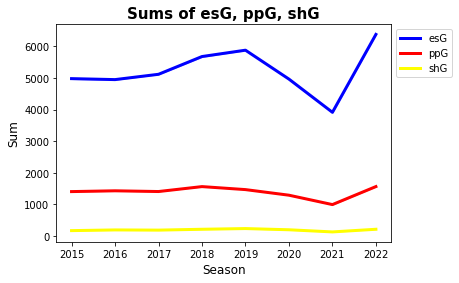

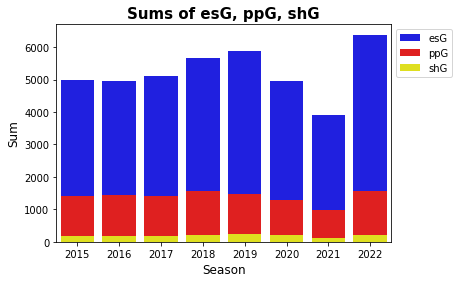

In [441]:
plt.subplot()
sns.lineplot(x="Season", y=data["esG"], data=data, ci=False, estimator=sum, linewidth=3, label="esG", color="blue")
sns.lineplot(x="Season", y=data["ppG"], data=data, ci=False, estimator=sum, linewidth=3, label="ppG", color="red")
sns.lineplot(x="Season", y=data["shG"], data=data, ci=False, estimator=sum, linewidth=3, label="shG", color="yellow")
plt.title("Sums of esG, ppG, shG", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Sum", fontsize=12)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.subplot()
sns.barplot(x="Season", y=data["esG"], data=data, ci=False, estimator=sum, linewidth=3, label="esG", color="blue")
sns.barplot(x="Season", y=data["ppG"], data=data, ci=False, estimator=sum, linewidth=3, label="ppG", color="red")
sns.barplot(x="Season", y=data["shG"], data=data, ci=False, estimator=sum, linewidth=3, label="shG", color="yellow")
plt.title("Sums of esG, ppG, shG", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Sum", fontsize=12)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [442]:
# Teams with the most total points scored by their players during the last 7 seasons, sorted in descending order. Tampa Bay Lightning is first with 5452 points.
data.groupby("Team_ID")["PTS"].sum().sort_values(ascending=False).reset_index()

,Team_ID,PTS
0,TBL,5452
1,PIT,5306
2,WSH,5299
3,TOR,5214
4,FLA,5115
5,STL,5052
6,CGY,5030
7,WPG,5008
8,MIN,4994
9,COL,4979


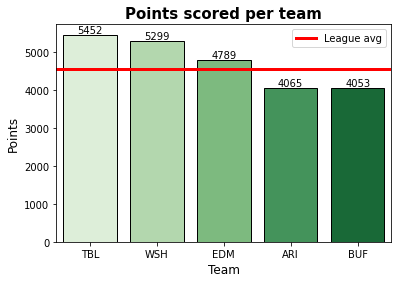

In [443]:
# Points scored per team in a barplot with 2 most best teams, 2 worst teams and 1 team that was in the middle of our list. (2 expansion teams excluded.)
ax = sns.barplot(x="Team_ID", y="PTS", data=data[data["Team_ID"].isin(["TBL", "WSH", "EDM","ARI","BUF"])], estimator=sum, palette="Greens", ci=False, order=["TBL", "WSH", "EDM","ARI","BUF"], ec="black")
plt.title("Points scored per team", fontsize=15, fontweight="bold")
plt.xlabel("Team", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"].sum()/(len(data["Team_ID"].unique())), linewidth=3, c="r", label="League avg")
for i in ax.containers:
    ax.bar_label(i)
plt.legend()
plt.show()

In [444]:
# I want to know which players contributed the most to total points scored by Tampa Bay Lightning, Nikita Kucherov led them with 598 points.
data[data["Team_ID"] == "TBL"].groupby("Player_Name").agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).reset_index().head(5)

,Player_Name,PTS
0,Nikita Kucherov,598
1,Steven Stamkos,546
2,Victor Hedman,459
3,Brayden Point,368
4,Ondrej Palat,360


In [445]:
# Which players scored the most points during 1 season? Again, Nikita Kucherov is on the first place with 122 points in season 2019. Steven Stamkos scored the most goals, 42.
tbltop5seasons = data[["Player_Name", "Team_ID", "Pos", "G", "A", "PTS", "Avg_TOI", "Season"]][data["Team_ID"] == "TBL"].sort_values(by="PTS", ascending=False).reset_index().head(20)
tbltop5seasons

,index,Player_Name,Team_ID,Pos,G,A,PTS,Avg_TOI,Season
0,4676,Nikita Kucherov,TBL,RW,41,87,128,19:58,2019
1,8272,Steven Stamkos,TBL,C,42,64,106,18:29,2022
2,3615,Nikita Kucherov,TBL,RW,39,61,100,19:49,2018
3,5079,Steven Stamkos,TBL,C,45,53,98,18:18,2019
4,4932,Brayden Point,TBL,C,41,51,92,18:55,2019
5,4008,Steven Stamkos,TBL,C,27,59,86,18:46,2018
6,2579,Nikita Kucherov,TBL,RW,40,45,85,19:26,2017
7,7702,Victor Hedman,TBL,D,20,65,85,25:05,2022
8,5735,Nikita Kucherov,TBL,RW,33,52,85,18:52,2020
9,2463,Victor Hedman,TBL,D,16,56,72,24:30,2017


In [446]:
# Most 80+ seasons in the NHL in the last 7 seasons.
plus80 = data[data["PTS"] >= 80].groupby(["Player_Name"]).agg({"PTS":"count"}).reset_index()
plus80.rename(columns={"PTS":"80+pts"}, inplace=True)
plus80.sort_values(by="80+pts", ascending=False)

,Player_Name,80+pts
50,Sidney Crosby,6
11,Connor McDavid,6
44,Patrick Kane,5
6,Brad Marchand,5
43,Nikita Kucherov,4
3,Artemi Panarin,4
1,Alex Ovechkin,4
40,Nathan MacKinnon,4
32,Leon Draisaitl,4
51,Steven Stamkos,3


In [447]:
# Most points per every team in the NHL in one season.
teambest = data[["Player_Name","Team_ID","Season","PTS"]].sort_values(by="PTS", ascending=False).drop_duplicates("Team_ID").sort_values(by="Team_ID")
teambest["DiffFromAvg"] = teambest["PTS"] - teambest["PTS"].mean()
teambest

,Player_Name,Team_ID,Season,PTS,DiffFromAvg
2385,Ryan Getzlaf,ANA,2017,73,-19.1875
3586,Clayton Keller,ARI,2018,65,-27.1875
4768,Brad Marchand,BOS,2019,100,7.8125
4409,Jack Eichel,BUF,2019,82,-10.1875
4145,Sebastian Aho,CAR,2019,83,-9.1875
4887,Artemi Panarin,CBJ,2019,87,-5.1875
7622,Johnny Gaudreau,CGY,2022,115,22.8125
4638,Patrick Kane,CHI,2019,110,17.8125
4755,Nathan MacKinnon,COL,2019,99,6.8125
1086,Jamie Benn,DAL,2016,89,-3.1875


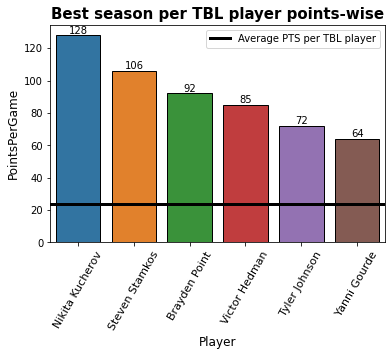

In [448]:
# 5 best players of the last 7 seasons in TBL uniform and their respecitve best seasons points-wise.
ax = sns.barplot(x="Player_Name",y="PTS",data=tbltop5seasons, estimator=max, ci=False, ec="black")
plt.title("Best season per TBL player points-wise", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.xticks(rotation=60, fontsize=11)
plt.axhline(data["PTS"][data["Team_ID"] == "TBL"].mean(),0,1,linewidth=3, c="black", label="Average PTS per TBL player")
for i in ax.containers:
    ax.bar_label(i)
plt.legend()
plt.show()

In [449]:
# Listing top 10 forwards in the last 7 seasons based on their Points total and calculating their Points per game.
ptsoverall = data[data["Pos"].isin(["LW","RW","C","W","F"])].groupby(["Player_Name"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10).reset_index()
ptsoverall["PointsPerGame"] = (ptsoverall["PTS"])/(ptsoverall["GP"])
ptsoverall

,Player_Name,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,487.0,239,458,697,1.431211
1,Patrick Kane,592.0,252,435,687,1.160473
2,Sidney Crosby,558.0,243,397,640,1.146953
3,Leon Draisaitl,558.0,254,362,616,1.103943
4,Brad Marchand,574.0,259,350,609,1.060976
5,Johnny Gaudreau,601.0,209,399,608,1.011647
6,Nikita Kucherov,510.0,237,361,598,1.172549
7,Alex Ovechkin,595.0,358,238,596,1.001681
8,Nathan MacKinnon,556.0,218,367,585,1.052158
9,John Tavares,599.0,255,325,580,0.968280


In [450]:
# Listing top 10 defensemen in the last 7 seasons based on their Points total and calculating their Points per game.
ptsdmen = data[data["Pos"] == "D"].groupby(["Player_Name"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10).reset_index()
ptsdmen["PointsPerGame"] = (ptsdmen["PTS"])/(ptsdmen["GP"])
ptsdmen

,Player_Name,GP,G,A,PTS,PointsPerGame
0,Brent Burns,618.0,130,359,489,0.791262
1,Roman Josi,588.0,117,351,468,0.795918
2,Victor Hedman,565.0,105,354,459,0.812389
3,John Carlson,571.0,99,360,459,0.803853
4,Erik Karlsson,523.0,90,333,423,0.808795
5,Kris Letang,519.0,89,330,419,0.807322
6,Tyson Barrie,577.0,80,304,384,0.665511
7,John Klingberg,552.0,71,303,374,0.677536
8,Torey Krug,556.0,64,306,370,0.665468
9,Keith Yandle,614.0,42,307,349,0.568404


In [451]:
# Concatenate both datasets into one.
ptsall = pd.concat([ptsoverall,ptsdmen],ignore_index=True)
ptsall.sort_values(by="PTS", ascending=False)


,Player_Name,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,487.0,239,458,697,1.431211
1,Patrick Kane,592.0,252,435,687,1.160473
2,Sidney Crosby,558.0,243,397,640,1.146953
3,Leon Draisaitl,558.0,254,362,616,1.103943
4,Brad Marchand,574.0,259,350,609,1.060976
5,Johnny Gaudreau,601.0,209,399,608,1.011647
6,Nikita Kucherov,510.0,237,361,598,1.172549
7,Alex Ovechkin,595.0,358,238,596,1.001681
8,Nathan MacKinnon,556.0,218,367,585,1.052158
9,John Tavares,599.0,255,325,580,0.968280


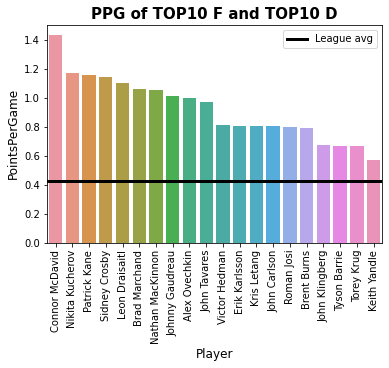

In [452]:
sns.barplot(x="Player_Name",y="PointsPerGame",data=ptsall.sort_values(by="PointsPerGame", ascending=False))
plt.title("PPG of TOP10 F and TOP10 D", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.axhline((data["PTS"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="League avg")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [453]:
# Listing top 10 players in the last 7 seasons with the most Hits total, sorted by HIT sum and calculating their Hits per game.
hits = data.groupby(["Player_Name"]).agg({"GP":"sum","HIT":"sum"}).sort_values(by="HIT", ascending=False).head(10).reset_index()
hits["HitsPerGame"] = hits["HIT"]/hits["GP"]
hitsuni = hits["Player_Name"].unique()
hits

,Player_Name,GP,HIT,HitsPerGame
0,Matt Martin,537.0,2127.0,3.960894
1,Ryan Reaves,561.0,1998.0,3.561497
2,Radko Gudas,515.0,1893.0,3.675728
3,Cal Clutterbuck,514.0,1835.0,3.570039
4,Milan Lucic,611.0,1764.0,2.887070
5,Mark Borowiecki,433.0,1755.0,4.053118
6,Tom Wilson,565.0,1745.0,3.088496
7,Marcus Foligno,543.0,1588.0,2.924494
8,Adam Lowry,539.0,1535.0,2.847866
9,Rasmus Ristolainen,574.0,1519.0,2.646341


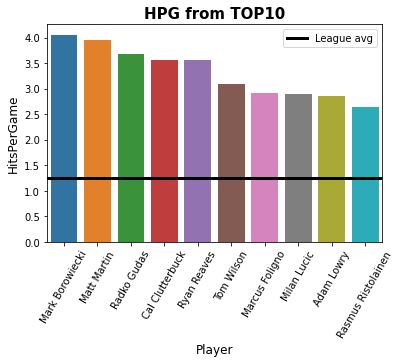

In [454]:
sns.barplot(x="Player_Name",y="HitsPerGame",data=hits.sort_values(by="HitsPerGame", ascending=False))
plt.title("HPG from TOP10", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("HitsPerGame", fontsize=12)
plt.axhline((data["HIT"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="League avg")
plt.xticks(rotation=60)
plt.legend()
plt.show()

<Figure size 864x720 with 0 Axes>

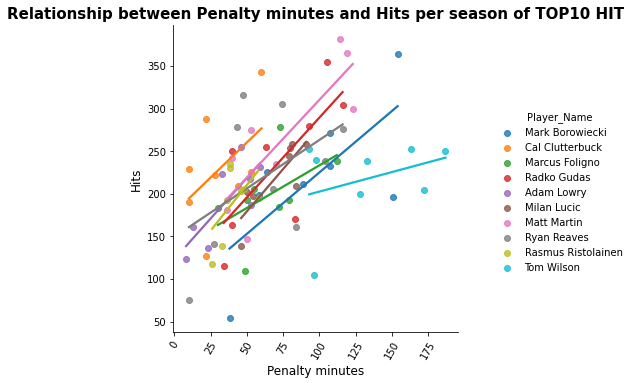

In [455]:
plt.figure(figsize=(12,10))
ax = sns.lmplot(x="PIM",y="HIT", data=data[data["Player_Name"].isin(hitsuni)], hue="Player_Name", ci=False)
plt.title("Relationship between Penalty minutes and Hits per season of TOP10 HIT", fontsize=15, fontweight="bold")
plt.xlabel("Penalty minutes", fontsize=12)
plt.ylabel("Hits", fontsize=12)
plt.xticks(rotation=60)
plt.show()


In [456]:
# Listing top 10 players in the last 7 seasons with the most Blocks total, sorted by BLK sum and calculating their Blocks per game.
blks = data.groupby(["Player_Name"]).agg({"GP":"sum","BLK":"sum"}).sort_values(by="BLK", ascending=False).head(10).reset_index()
blks["BlocksPerGame"] = hits["HIT"]/hits["GP"]
blks

,Player_Name,GP,BLK,BlocksPerGame
0,Kris Russell,480.0,1358.0,3.960894
1,Andy Greene,580.0,1227.0,3.561497
2,Mark Giordano,575.0,1207.0,3.675728
3,Alec Martinez,483.0,1160.0,3.570039
4,Alex Goligoski,597.0,1105.0,2.887070
5,Roman Josi,588.0,1101.0,4.053118
6,Ryan McDonagh,537.0,1095.0,3.088496
7,Alex Pietrangelo,574.0,1091.0,2.924494
8,Alexander Edler,472.0,1089.0,2.847866
9,Jacob Trouba,532.0,1075.0,2.646341


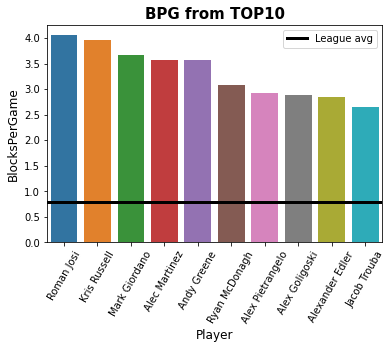

In [457]:
sns.barplot(x="Player_Name",y="BlocksPerGame",data=blks.sort_values(by="BlocksPerGame", ascending=False))
plt.title("BPG from TOP10", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("BlocksPerGame", fontsize=12)
plt.axhline((data["BLK"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="League avg")
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [458]:
# Listing top 10 Centers in the last 7 seasons with the most Faceoffs won, sorted by FOW sum and calculating their FOW%.
fow10 = data[data["Pos"] == "C"].groupby(["Player_Name"]).agg({"GP":"sum","FOW":"sum","FOL":"sum"}).sort_values(by="FOW", ascending=False).head(10).reset_index()
fow10["FOW%"] = fow10["FOW"]/((fow10["FOW"])+(fow10["FOL"]))*100
fow10

,Player_Name,GP,FOW,FOL,FOW%
0,Ryan O'Reilly,593.0,7618.0,5689.0,57.248065
1,Patrice Bergeron,557.0,7424.0,5116.0,59.202552
2,Anze Kopitar,606.0,6859.0,5726.0,54.501391
3,Sidney Crosby,558.0,6593.0,6009.0,52.317093
4,Jonathan Toews,530.0,6323.0,4740.0,57.154479
5,Bo Horvat,572.0,6086.0,5275.0,53.569228
6,John Tavares,599.0,5965.0,5038.0,54.212488
7,Ryan Johansen,598.0,5561.0,4883.0,53.245883
8,Aleksander Barkov,542.0,5385.0,4913.0,52.291707
9,Jordan Staal,531.0,5384.0,4074.0,56.925354


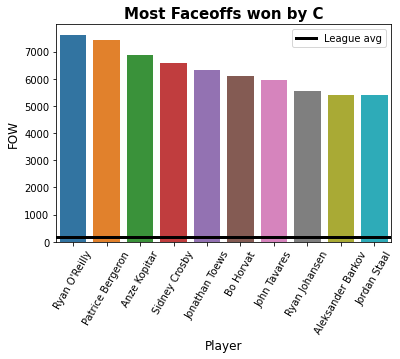

In [459]:
sns.barplot(x="Player_Name",y="FOW",data=fow10.sort_values(by="FOW", ascending=False))
plt.title("Most Faceoffs won by C", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("FOW", fontsize=12)
plt.xticks(rotation=60)
plt.axhline(data["FOW"][data["Pos"] == "C"].mean(),0,1, color="black", linewidth=3, label="League avg")
plt.legend()
plt.show()

In [460]:
print("Ovi shots in 2022: ",data["S"][(data["Player_Name"] == "Alex Ovechkin") & (data["Season"] == 2022)].sum(), "\n")
print("WSH team total shots in 2022: ",data["S"][(data["Team_ID"] == "WSH") & (data["Season"] == 2022)].sum(), "\n")
print("Percentage of Ovi' shots compared to team total in 2022: ",(data["S"][(data["Player_Name"] == "Alex Ovechkin") & (data["Season"] == 2022)])/(data["S"][(data["Team_ID"] == "WSH") & (data["Season"] == 2022)].sum())*100)
# Ovechkin had almost 13% of all WSH shots in 2022.

Ovi shots in 2022:  334.0 

WSH team total shots in 2022:  2577.0 

Percentage of Ovi' shots compared to team total in 2022:  8060    12.960807
Name: S, dtype: float64


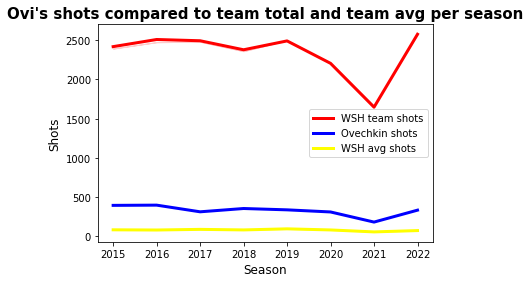

In [461]:
# Ovechkin's shots per season compared to team total and team average.
sns.lineplot(x="Season", y=data["S"][data["Team_ID"] == "WSH"], data=data, ci=False, estimator=sum, linewidth=3, label="WSH team shots", color="red")
sns.lineplot(x="Season", y=data["S"][data["Player_Name"] == "Alex Ovechkin"], data=data, ci=False, estimator=sum, linewidth=3, label="Ovechkin shots", color="blue")
sns.lineplot(x="Season", y=data["S"][data["Team_ID"] == "WSH"], data=data, ci=False, linewidth=3, label="WSH avg shots", color="yellow")
plt.title("Ovi's shots compared to team total and team avg per season", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Shots", fontsize=12)
plt.show()

In [462]:
# Creating a new Shooting percentage column.
data["S_Pct"] = (data["G"]/data["S"])*100
data["S_Pct"].dtype
print("Average shooting percentage of all players is : ",data["S_Pct"].mean())
print("Average shooting percentage of all defensemen is : ",data["S_Pct"][data["Pos"] == "D"].mean())
print("Average shooting percentage of all forwards is : ",data["S_Pct"][data["Pos"] != "D"].mean())

Average shooting percentage of all players is :  7.761628542306192
Average shooting percentage of all defensemen is :  4.158558580759679
Average shooting percentage of all forwards is :  9.651857790620008


In [463]:
print("Avg shooting % of players with 30+ goals during 1 season in the last 7 seasons: ", data["S_Pct"][data["G"] >= 30].mean(),"\n")
print("Matthews avg shooting %: ", data["S_Pct"][data["Player_Name"] == "Auston Matthews"].mean())
print("Matthews 2022 shooting %: ", data["S_Pct"][(data["Player_Name"] == "Auston Matthews") & (data["Season"] == 2022)].mean(), "\n")
print("Kreider avg shooting %: ", data["S_Pct"][data["Player_Name"] == "Chris Kreider"].mean())
print("Kreider 2022 shooting %: ", data["S_Pct"][(data["Player_Name"] == "Chris Kreider") & (data["Season"] == 2022)].mean())

Avg shooting % of players with 30+ goals during 1 season in the last 7 seasons:  15.331322807102422 

Matthews avg shooting %:  16.52941932194222
Matthews 2022 shooting %:  17.24137931034483 

Kreider avg shooting %:  15.096030875636027
Kreider 2022 shooting %:  20.155038759689923


In [464]:
# Displaying 10 forwards with the highest shooting percentage, while having more than 100 shots in the season 2022
bestsc = data[["Player_Name","Season","S","S_Pct","G"]][(data["S"] > 100) & (data["Season"] == 2022)].sort_values(by="S_Pct", ascending=False).head(10)
bestsc

,Player_Name,Season,S,S_Pct,G
7303,Ivan Barbashev,2022,111.0,23.423423,26
7756,Ryan Johansen,2022,118.0,22.033898,26
8029,Brock Nelson,2022,171.0,21.637427,37
8208,Brayden Schenn,2022,111.0,21.621622,24
8039,Joshua Norris,2022,172.0,20.348837,35
7833,Chris Kreider,2022,258.0,20.155039,52
7867,Gabriel Landeskog,2022,150.0,20.000000,30
7531,Leon Draisaitl,2022,278.0,19.784173,55
7748,Tanner Jeannot,2022,124.0,19.354839,24
8319,Troy Terry,2022,192.0,19.270833,37


In [465]:
# Displaying their career averages for comparison.
bestscuni = bestsc["Player_Name"].unique()
for w in bestscuni:
    print(w)
    wavg = data["S_Pct"][data["Player_Name"] == w].mean()
    print(wavg)

Ivan Barbashev
18.934480992620525
Ryan Johansen
11.699207886638625
Brock Nelson
14.59943233030105
Brayden Schenn
14.764019981303715
Joshua Norris
12.685723514211887
Chris Kreider
15.096030875636027
Gabriel Landeskog
13.53397835153154
Leon Draisaitl
15.965094486834229
Tanner Jeannot
20.546984572230016
Troy Terry
10.179042584871947


In [466]:
# Displaying 10 forwards with the lowest shooting percentage while having more than 200 shots in the 2022 season.
worstsc = data[["Player_Name","Season","S","S_Pct","G"]][(data["S"] > 200) & (data["Season"] == 2022) & (data["Pos"].isin(["LW","RW","C","W","F"]))].sort_values(by="S_Pct", ascending=True).head(10)
worstsc

,Player_Name,Season,S,S_Pct,G
7294,Mikael Backlund,2022,214.0,5.607477,12
7824,Travis Konecny,2022,220.0,7.272727,16
7462,Blake Coleman,2022,212.0,7.547170,16
8173,Evan Rodrigues,2022,243.0,7.818930,19
7737,Alex Iafallo,2022,215.0,7.906977,17
8006,Trevor Moore,2022,202.0,8.415842,17
7340,Patrice Bergeron,2022,293.0,8.532423,25
7282,Viktor Arvidsson,2022,227.0,8.810573,20
7825,Anze Kopitar,2022,210.0,9.047619,19
7790,Patrick Kane,2022,287.0,9.059233,26


In [467]:
# Displaying their career averages for comparison.
worstscuni = worstsc["Player_Name"].unique()
for w in worstscuni:
    print(w)
    wavg = data["S_Pct"][data["Player_Name"] == w].mean()
    print(wavg)

Mikael Backlund
9.157394450382466
Travis Konecny
11.718469296818794
Blake Coleman
7.606009304944359
Evan Rodrigues
8.61051971320558
Alex Iafallo
9.601527240765112
Trevor Moore
10.115666499008942
Patrice Bergeron
11.696694373778158
Viktor Arvidsson
9.347240336179155
Anze Kopitar
12.660910018881811
Patrick Kane
11.68467322762161


In [468]:
data["S_PctTeamAvg"] = "Below"
for i in  data["Team_ID"].unique():
    teamspct = data["S_Pct"][data["Team_ID"] == i].mean()
    data["S_PctTeamAvg"][(data["Team_ID"] == i) & (data["S_Pct"] > teamspct)] = "Above"

C:\Users\krist\AppData\Local\Temp\ipykernel_14236\2108665210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["S_PctTeamAvg"][(data["Team_ID"] == i) & (data["S_Pct"] > teamspct)] = "Above"
C:\Users\krist\AppData\Local\Temp\ipykernel_14236\2108665210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["S_PctTeamAvg"][(data["Team_ID"] == i) & (data["S_Pct"] > teamspct)] = "Above"
C:\Users\krist\AppData\Local\Temp\ipykernel_14236\2108665210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [469]:
data["S_PctTeamAvg"].value_counts()

Below    4375
Above    3482
Name: S_PctTeamAvg, dtype: int64

In [470]:
print("Colorado Avalanche team shooting percentage: ",data["S_Pct"][data["Team_ID"] == "COL"].mean())
print("Count of players below/above the team average:")
print(data["S_PctTeamAvg"][data["Team_ID"] == "COL"].value_counts())
data[["Player_Name","Team_ID","S_Pct", "S_PctTeamAvg"]][(data["Team_ID"] == "COL") & (data["S_Pct"] > 7.859518109036625)]

Colorado Avalanche team shooting percentage:  7.859518109036625
Count of players below/above the team average:
Below    152
Above    109
Name: S_PctTeamAvg, dtype: int64


,Player_Name,Team_ID,S_Pct,S_PctTeamAvg
40,Tyson Barrie,COL,8.633094,Above
113,Daniel Briere,COL,11.594203,Above
250,Matt Duchene,COL,10.144928,Above
402,Freddie Hamilton,COL,9.090909,Above
452,Jarome Iginla,COL,15.343915,Above
...,...,...,...,...
8031,Alex Newhook,COL,11.504425,Above
8032,Valeri Nichushkin,COL,13.888889,Above
8138,Mikko Rantanen,COL,14.173228,Above
8233,Kiefer Sherwood,COL,11.111111,Above


In [471]:
# I want to look more closely on some of the best defensemen that played in this time span. Namely Kris Letang, John Carlson and Roman Josi.
dmen = data[data["Player_Name"].isin(["Kris Letang", "John Carlson", "Roman Josi"])].groupby(["Player_Name"]).agg({"G":["min","max","mean"],"A":["min","max","mean"],"PTS":["min","max","mean"], "GP":"mean"}).reset_index()
dmenunique = dmen["Player_Name"].unique()
dmen.columns = dmen.columns.map("_".join)
dmen

,Player_Name_,G_min,G_max,G_mean,A_min,A_max,A_mean,PTS_min,PTS_max,PTS_mean,GP_mean
0,John Carlson,8,17,12.375,28,60,45.000,37,75,57.375,71.375
1,Kris Letang,5,16,11.125,29,58,41.250,34,68,52.375,64.875
2,Roman Josi,8,23,14.625,25,73,43.875,33,96,58.500,73.500


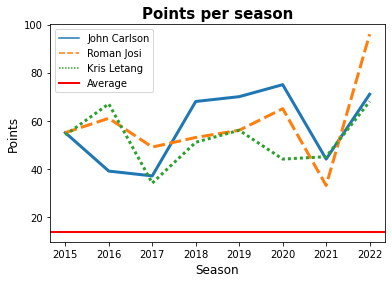

In [472]:
# Points per season of the 3 defensemen from the previous table in a linegraph. Roman Josi and Kris Letang had their career years in the last season.
sns.lineplot(x="Season", y="PTS", hue="Player_Name", data=data[data["Player_Name"].isin(dmenunique)], style="Player_Name", linewidth=3)
plt.title("Points per season", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"][data["Pos"] == "D"].mean(),0,1,linewidth=2, c="r", label="Average")
plt.legend(fontsize=10)
plt.show()


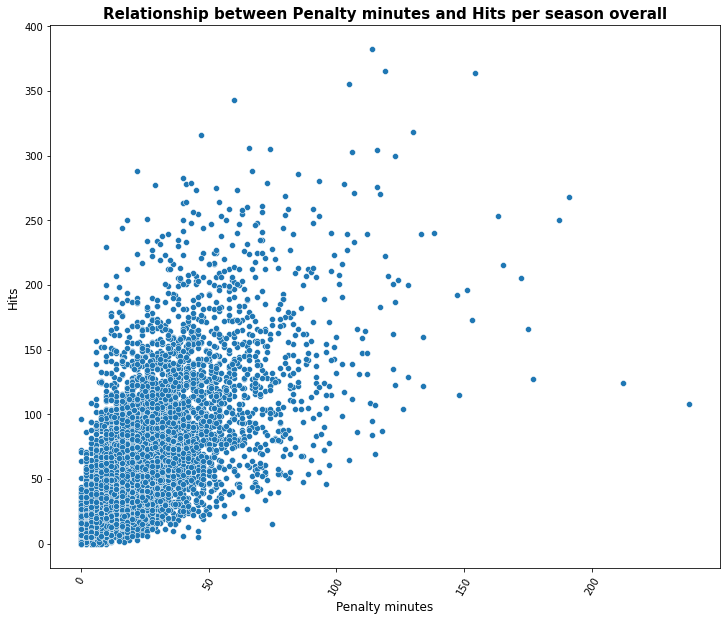

In [473]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="PIM",y="HIT", data=data)
plt.title("Relationship between Penalty minutes and Hits per season overall", fontsize=15, fontweight="bold")
plt.xlabel("Penalty minutes", fontsize=12)
plt.ylabel("Hits", fontsize=12)
plt.xticks(rotation=60)
plt.show()


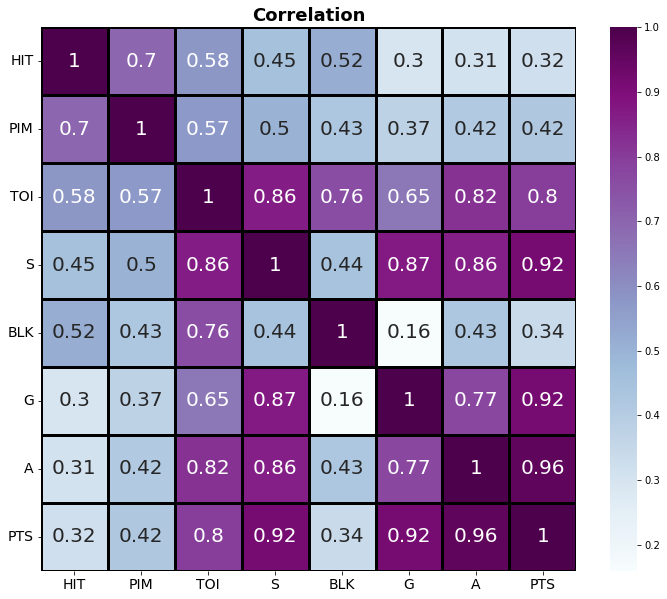

In [474]:
# Correlation coefficient of 8 numeric columns in a heat map.
cori = data[["HIT","PIM","TOI","S","BLK", "G", "A", "PTS"]].corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(cori, annot=True, annot_kws={"size":20}, cmap="BuPu", linewidths=3, linecolor="black")
plt.title("Correlation", fontsize=18, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()

In [475]:
# Creating a new dataframe of players from Pittsburgh Penguins in season 2022.
penguins = data[["Player_Name", "Team_ID", "GP", "G", "A", "PTS", "xGF", "xGA", "TOI"]][(data["Team_ID"] == "PIT") & (data["Season"] == 2022)].sort_values(by="xGF", ascending=False)
penguins["G60"] = (penguins["G"]/penguins["TOI"])*60
penguins["A60"] = (penguins["A"]/penguins["TOI"])*60
penguins["PTS60"] = (penguins["PTS"]/penguins["TOI"])*60
penguins["xGF60"] = (penguins["xGF"]/penguins["TOI"])*60
penguins["xGA60"] = (penguins["xGA"]/penguins["TOI"])*60
penguins["xGF60%"] = (penguins["xGF60"]/(penguins["xGF60"] + penguins["xGA60"]))
print("Average xGF60 for PIT is: ", penguins["xGF60"].mean())
print("Average xGA60 for PIT is: ", penguins["xGA60"].mean())
penguins.sort_values(by="PTS", ascending=False)

Average xGF60 for PIT is:  2.3476935797708642
Average xGA60 for PIT is:  2.174927866573842


,Player_Name,Team_ID,GP,G,A,PTS,xGF,xGA,TOI,G60,A60,PTS60,xGF60,xGA60,xGF60%
7662,Jake Guentzel,PIT,76.0,40,44,84,69.0,58.1,1527.0,1.571709,1.728880,3.300589,2.711198,2.282908,0.542880
7483,Sidney Crosby,PIT,69.0,31,53,84,63.4,52.3,1378.0,1.349782,2.307692,3.657475,2.760522,2.277213,0.547969
7892,Kris Letang,PIT,78.0,10,58,68,75.0,72.3,2011.0,0.298359,1.730482,2.028841,2.237693,2.157136,0.509165
8188,Bryan Rust,PIT,60.0,24,34,58,44.1,42.1,1126.0,1.278863,1.811723,3.090586,2.349911,2.243339,0.511601
7423,Jeff Carter,PIT,76.0,19,26,45,43.9,46.3,1343.0,0.848846,1.161579,2.010424,1.961281,2.068503,0.486696
8173,Evan Rodrigues,PIT,82.0,19,24,43,54.0,42.3,1299.0,0.877598,1.108545,1.986143,2.494226,1.953811,0.560748
7935,Evgeni Malkin,PIT,41.0,20,22,42,30.5,24.6,752.0,1.595745,1.755319,3.351064,2.433511,1.962766,0.553539
7703,Danton Heinen,PIT,76.0,18,15,33,41.9,34.3,966.0,1.118012,0.931677,2.049689,2.602484,2.130435,0.549869
7791,Kasperi Kapanen,PIT,79.0,11,21,32,44.7,38.7,1148.0,0.574913,1.097561,1.672474,2.336237,2.022648,0.535971
7954,Mike Matheson,PIT,74.0,11,20,31,62.8,56.2,1391.0,0.474479,0.862689,1.337168,2.708843,2.424155,0.527731


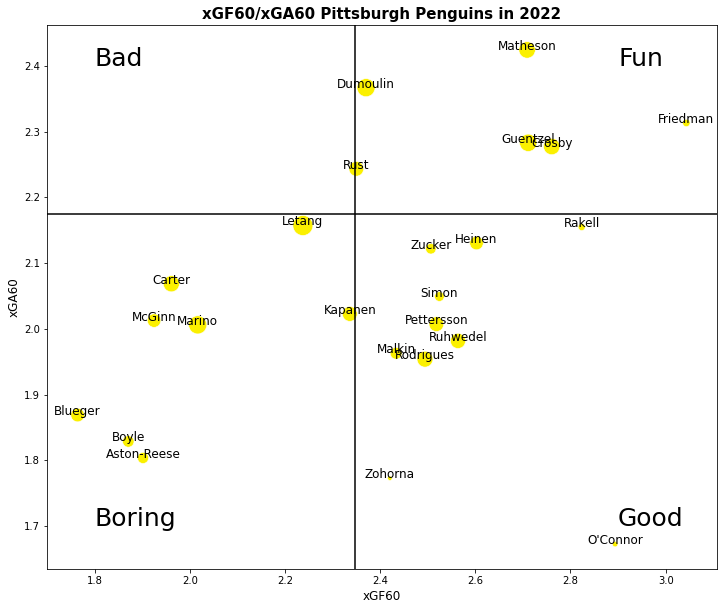

In [476]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="xGF60",y="xGA60",data=penguins[penguins["GP"] > 10], size="TOI", sizes=(20,400), color = "#FBF000")
for i in penguins["Player_Name"][penguins["GP"] > 10].unique():
        plt.text(penguins["xGF60"][(penguins["Player_Name"]== i) & (penguins["GP"] > 10)],penguins["xGA60"][(penguins["Player_Name"]== i) & (penguins["GP"] > 10)],i.split(" ")[-1], fontsize=12, ha="center")
plt.text(1.8, 1.7, "Boring", fontsize=25)
plt.text(2.9, 1.7, "Good", fontsize=25)
plt.text(1.8, 2.4, "Bad", fontsize=25)
plt.text(2.9, 2.4, "Fun", fontsize=25)
plt.axvline(2.3476935797708642, 0,1, color="black")
plt.axhline(2.174927866573842, 0,1, color="black")
plt.title("xGF60/xGA60 Pittsburgh Penguins in 2022", fontsize=15, fontweight="bold")
plt.xlabel("xGF60", fontsize=12)
plt.ylabel("xGA60", fontsize=12)
plt.legend().remove()
plt.show()



In [477]:
# Importing new dataset.
pit = pd.read_csv("C:\Kiki\python_tutorial\pittsburgh2022.csv")

In [478]:
pit

,playerId,season,name,team,position,situation,games_played,height,weight,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8475722,2021,Jason Zucker,PIT,L,other,41,180,85,316,9,13.42,0.39,0.59,0.67,0.48,0.64,0.48,99,5.58,0.96,0.47,1.19,0.23,2.42,1.72,0.87,0.96,0.87,0,0,6,1,0,7,2,2,1,2,0,0,1,3,4,5,0,0,0,0,1,0,3,3,1,0.14,0.39,0.43,1,0,1,7.00,7,7.00,0,0.13,0.13,0.61,0.48,0.48,0.47,9,1,0,0,8,2,2,4,1,0,0,1677,0,2,1,0,10.35,1.49,1.38,1.49,1.38,9,5,2,16,2,3,2,8,5,1,0.43,0.64,0.43,1,0,1,16.00,14,14.00,0.26,0.61,0.61,1.14,1.14,1.11,5.72,2.35,2.35,2.35,2.35,6,2,0,8,3,0,0,5,0,3,0.17

In [479]:
# Shape of the imported dataset and head of the dataset.
print(pit.shape)
pit.head()

(140, 156)


,playerId,season,name,team,position,situation,games_played,height,weight,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8475722,2021,Jason Zucker,PIT,L,other,41,180,85,316,9,13.42,0.39,0.59,0.67,0.48,0.64,0.48,99,5.58,0.96,0.47,1.19,0.23,2.42,1.72,0.87,0.96,0.87,0,0,6,1,0,7,2,2,1,2,0,0,1,3,4,5,0,0,0,0,1,0,3,3,1,0.14,0.39,0.43,1,0,1,7.00,7,7.00,0,0.13,0.13,0.61,0.48,0.48,0.47,9,1,0,0,8,2,2,4,1,0,0,1677,0,2,1,0,10.35,1.49,1.38,1.49,1.38,9,5,2,16,2,3,2,8,5,1,0.43,0.64,0.43,1,0,1,16.0,14,14.00,0.26,0.61,0.61,1.14,1.14,1.11,5.72,2.35,2.35,2.35,2.35,6,2,0,8,3,0,0,5,0,3,0.17,

In [480]:
# Filtering the dataset based on the game situation - all.
pit = pit[pit["situation"] == "all"]

In [481]:
pit.shape

(28, 156)

In [482]:
pit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 136
Columns: 156 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(64), int64(88), object(4)
memory usage: 34.3+ KB


In [483]:
pit.head()

,playerId,season,name,team,position,situation,games_played,height,weight,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
1,8475722,2021,Jason Zucker,PIT,L,all,41,180,85,36458,739,21.23,0.59,0.53,0.55,0.51,0.56,0.51,278,92.95,9.93,7.21,20.61,3.09,49.80,36.35,9.52,10.11,9.70,5,4,102,25,19,146,17,8,10,3,26,2,31,50,94,119,6,15,4,66,15,22,86,34,7,3.04,4.26,2.63,2,4,2,148.68,127,129.07,11,1.63,2.33,2.20,9.36,9.55,9.30,739,111,58,93,477,112,97,106,424,4,11,113704,15,21,8,20,342.98,32.67,30.84,33.29,31.41,367,104,134,605,32,38,6,339,106,26,11.30,12.55,8.82,12,14,6,615.00,471,478.

In [484]:
# Deleting columns in which I'm not interested in.
pit = pit[['name', 'height',
 'weight','gameScore','I_F_takeaways',
 'I_F_giveaways','penalityMinutesDrawn','I_F_penalityMinutes', 'I_F_xGoals',]]

In [485]:
# Shapes of penguins and pit.
print(penguins.shape)
print(pit.shape)
# 3 more rows in penguins.

(31, 15)
(28, 9)


In [486]:
# Checking if the names of players in both datasets are the same.
pit["name"].unique() == penguins["Player_Name"].unique()

C:\Users\krist\AppData\Local\Temp\ipykernel_14236\3514940716.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  pit["name"].unique() == penguins["Player_Name"].unique()


False

In [487]:
# Checking which rows are not in pit.
print(np.setdiff1d(penguins["Player_Name"], pit["name"]))

['Dominik Simon' 'Sam Lafferty' 'Zach Aston-Reese']


In [488]:
# Inner joining both tables into one.
pitmerged = pd.merge(left=penguins, right=pit, how="inner", left_on=["Player_Name"], right_on=["name"])

In [489]:
pitmerged.head()

,Player_Name,Team_ID,GP,G,A,PTS,xGF,xGA,TOI,G60,A60,PTS60,xGF60,xGA60,xGF60%,name,height,weight,gameScore,I_F_takeaways,I_F_giveaways,penalityMinutesDrawn,I_F_penalityMinutes,I_F_xGoals
0,Kris Letang,PIT,78.0,10,58,68,75.0,72.3,2011.0,0.298359,1.730482,2.028841,2.237693,2.157136,0.509165,Kris Letang,183,91,70.85,59,79,27,49,9.69
1,Jake Guentzel,PIT,76.0,40,44,84,69.0,58.1,1527.0,1.571709,1.728880,3.300589,2.711198,2.282908,0.542880,Jake Guentzel,180,82,91.41,41,23,58,44,37.28
2,Brian Dumoulin,PIT,76.0,3,15,18,65.5,65.4,1658.0,0.108565,0.542823,0.651387,2.370326,2.366707,0.500382,Brian Dumoulin,193,94,23.42,34,46,14,24,3.90
3,Sidney Crosby,PIT,69.0,31,53,84,63.4,52.3,1378.0,1.349782,2.307692,3.657475,2.760522,2.277213,0.547969,Sidney Crosby,180,91,86.95,34,54,30,32,26.02
4,Mike Matheson,PIT,74.0,11,20,31,62.8,56.2,1391.0,0.474479,0.862689,1.337168,2.708843,2.424155,0.527731,Mike Matheson,188,85,46.75,43,43,37,33,7.13


In [490]:
# Dropping the "name" column.
pitmerged.drop(columns="name", inplace=True)

In [491]:
# Calculating new columns and sorting the dataframe by xG60.
pitmerged["GoalsAboveExpected"] = pitmerged["G"] - pitmerged["I_F_xGoals"]
pitmerged["xG60"] = (pitmerged["I_F_xGoals"] / pitmerged["TOI"])*60
pitmerged[["Player_Name", "GP","G", "I_F_xGoals", "GoalsAboveExpected", "G60", "xG60"]].sort_values(by="xG60", ascending=False)


,Player_Name,GP,G,I_F_xGoals,GoalsAboveExpected,G60,xG60
1,Jake Guentzel,76.0,40,37.28,2.72,1.571709,1.464833
10,Bryan Rust,60.0,24,25.45,-1.45,1.278863,1.356128
14,Evgeni Malkin,41.0,20,14.65,5.35,1.595745,1.168883
3,Sidney Crosby,69.0,31,26.02,4.98,1.349782,1.132946
6,Evan Rodrigues,82.0,19,22.84,-3.84,0.877598,1.054965
12,Danton Heinen,76.0,18,16.93,1.07,1.118012,1.051553
26,Valtteri Puustinen,1.0,0,0.17,-0.17,0.000000,1.020000
24,Kasper Bjorkqvist,6.0,1,0.84,0.16,1.200000,1.008000
11,Jeff Carter,76.0,19,22.52,-3.52,0.848846,1.006106
20,Drew O'Connor,22.0,3,3.77,-0.77,0.796460,1.000885


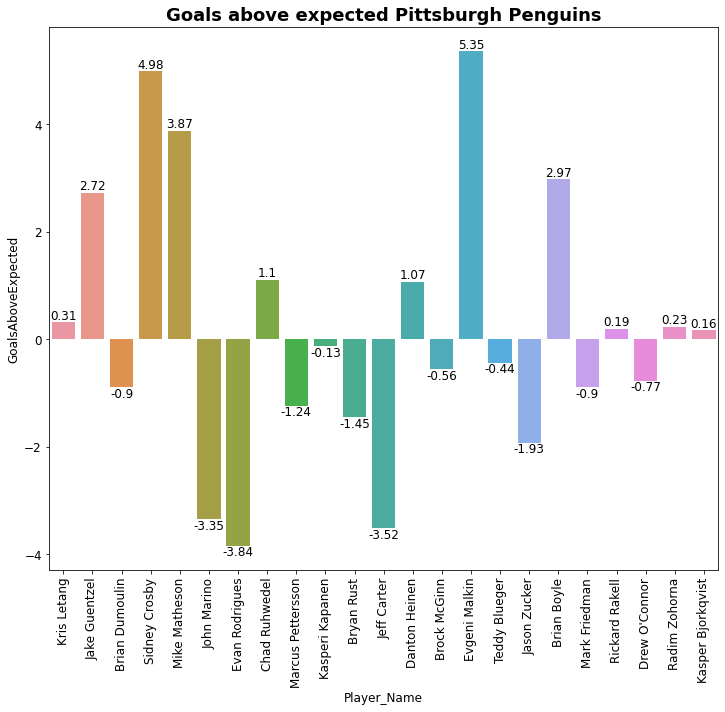

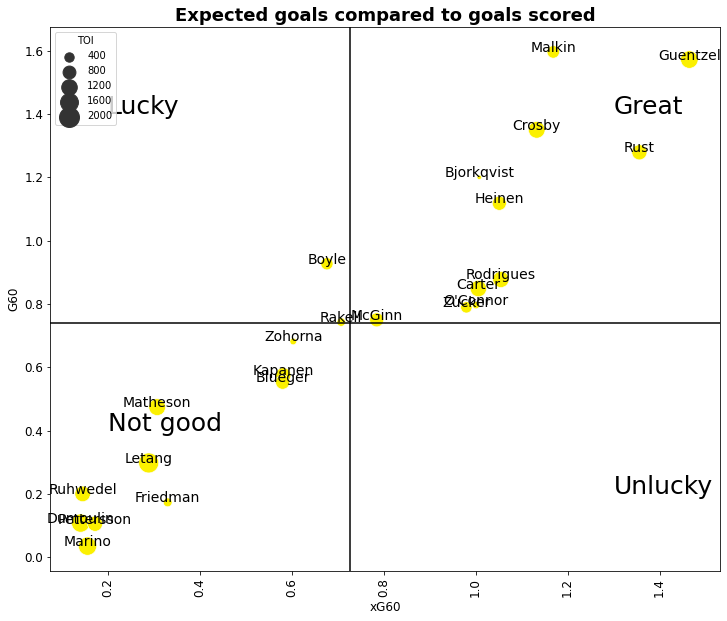

In [492]:
plt.figure(figsize=(12,10))
plt.subplot()
aux = sns.barplot(x="Player_Name",y="GoalsAboveExpected",data=pitmerged[pitmerged["GP"] > 5])
plt.title("Goals above expected Pittsburgh Penguins", fontsize=18, fontweight="bold")
plt.xlabel("Player_Name", fontsize=12)
for i in aux.containers:
    aux.bar_label(i, fontsize=12)
plt.ylabel("GoalsAboveExpected", fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.show()

plt.figure(figsize=(12,10))
plt.subplot()
sns.scatterplot(x="xG60",y="G60",data=pitmerged[pitmerged["GP"] > 5], size="TOI", sizes=(20,400), color = "#FBF000")
for i in pitmerged["Player_Name"][pitmerged["GP"] > 5].unique():
    plt.text(pitmerged["xG60"][(pitmerged["Player_Name"] == i) & (pitmerged["GP"] > 5)], pitmerged["G60"][(pitmerged["Player_Name"] == i) & (pitmerged["GP"] > 5)], i.split(" ")[-1], fontsize=14, ha="center")

plt.text(0.2, 0.4, "Not good", fontsize=25)
plt.text(1.3, 0.2, "Unlucky", fontsize=25)
plt.text(0.2, 1.4, "Lucky", fontsize=25)
plt.text(1.3, 1.4, "Great", fontsize=25)
plt.title("Expected goals compared to goals scored", fontsize=18, fontweight="bold")
plt.xlabel("xG60", fontsize=12)
plt.ylabel("G60", fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.axvline(pitmerged["xG60"][pitmerged["GP"] > 5].mean(), color="black")
plt.axhline(pitmerged["G60"][pitmerged["GP"] > 5].mean(), color="black")
plt.show()

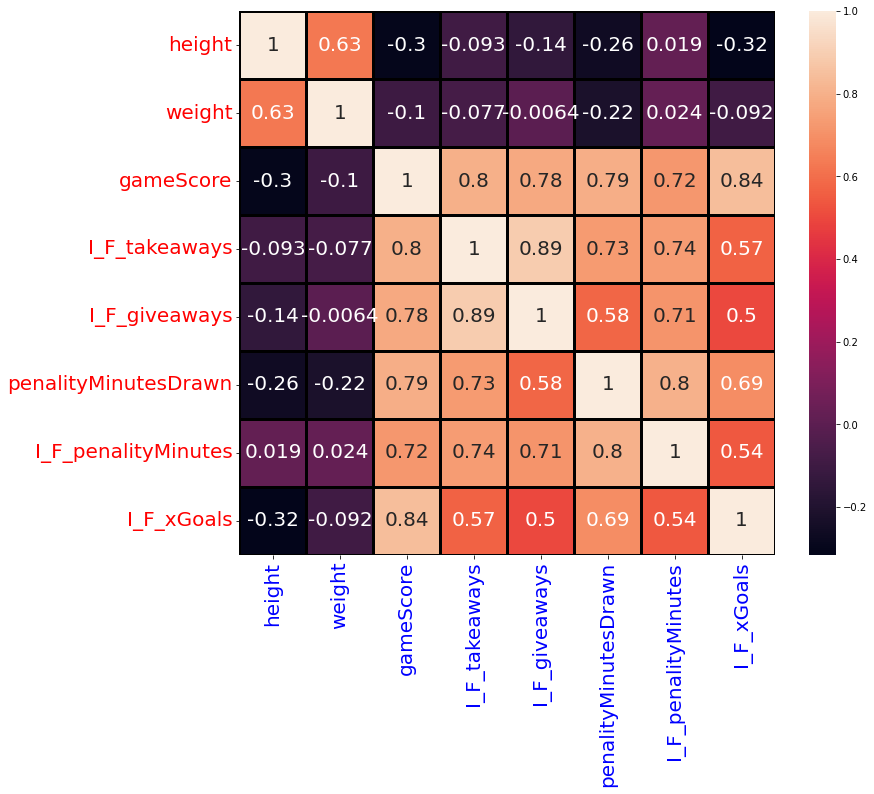

In [493]:
# Correlation in the dataframe between numeric columns.
plt.figure(figsize=(12,10))
sns.heatmap(pit.corr(), annot=True, annot_kws={"size":20}, linecolor="black", linewidths=3)
plt.xticks(fontsize=20, c="blue")
plt.yticks(fontsize=20, c="red")
plt.show()

In [494]:
# Again joining the dataframes with specific columns I'm interested in.
pitmerged1 = pd.merge(left=pitmerged[["Player_Name","weight", "height"]], right=data[["Player_Name","HIT", "Pos"]][data["Season"] == 2022], left_on="Player_Name", right_on="Player_Name", how="left")

In [495]:
pitmerged1.head()

,Player_Name,weight,height,HIT,Pos
0,Kris Letang,91,183,171.0,D
1,Jake Guentzel,82,180,72.0,C
2,Brian Dumoulin,94,193,88.0,D
3,Sidney Crosby,91,180,50.0,C
4,Mike Matheson,85,188,97.0,D


In [496]:
for i in pitmerged1["Pos"].unique():
    print(i)
    print("Average height : ", pitmerged1["height"][pitmerged1["Pos"] == i].mean())
    print("Average weight : ", pitmerged1["weight"][pitmerged1["Pos"] == i].mean(),"\n")
print("Tallest PIT player: ", pitmerged1[["Player_Name", "height"]].sort_values(by="height",ascending=False).head(1))
print("Shortest PIT player: ", pitmerged1[["Player_Name", "height"]].sort_values(by="height",ascending=True).head(1))
print("Heaviest PIT player: ", pitmerged1[["Player_Name", "weight"]].sort_values(by="weight",ascending=False).head(1))
print("Lightest PIT player: ", pitmerged1[["Player_Name", "weight"]].sort_values(by="weight",ascending=True).head(1))

D
Average height :  186.11111111111111
Average weight :  85.88888888888889 

C
Average height :  186.9
Average weight :  90.6 

RW
Average height :  183.0
Average weight :  88.66666666666667 

LW
Average height :  181.5
Average weight :  85.0 

F
Average height :  194.5
Average weight :  95.0 

Tallest PIT player:        Player_Name  height
22  Radim Zohorna     198
Shortest PIT player:             Player_Name  height
27  Valtteri Puustinen     176
Heaviest PIT player:      Player_Name  weight
17  Brian Boyle     111
Lightest PIT player:           Player_Name  weight
8  Marcus Pettersson      80


<Figure size 864x720 with 0 Axes>

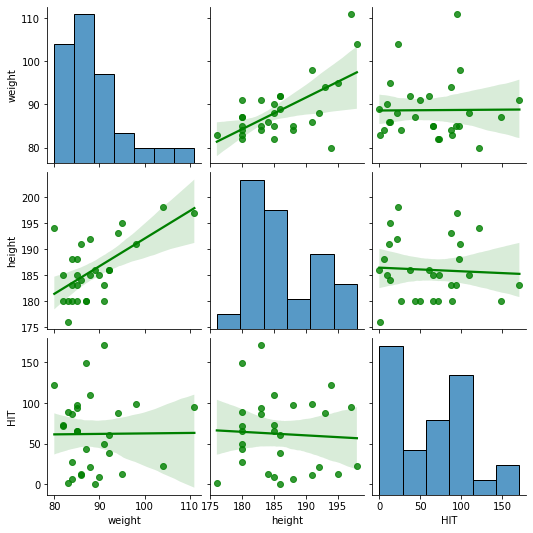

In [497]:
# Pair plot of all numeric columns.
plt.figure(figsize=(12,10))
sns.pairplot(data=pitmerged1, kind="reg", plot_kws={"color":"green"})
plt.show()


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'weight'), Text(0, 1.5, 'height'), Text(0, 2.5, 'HIT')])

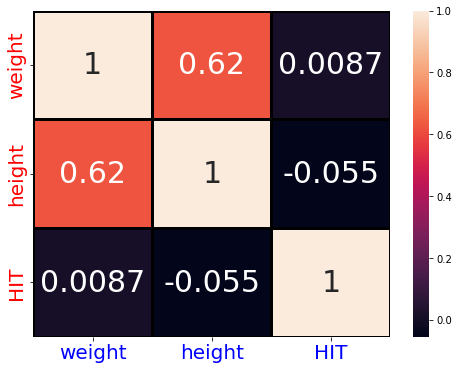

In [498]:
# Correlation in the dataframe between numeric columns.
plt.figure(figsize=(8,6))
sns.heatmap(pitmerged1.corr(), annot=True, annot_kws={"size":30}, linecolor="black", linewidths=3)
plt.xticks(fontsize=20, c="blue")
plt.yticks(fontsize=20, c="red")

In [499]:
# Calculating the P-Value
for s in pitmerged1.columns[~pitmerged1.columns.isin(["Player_Name","Pos"])]:
    for u in pitmerged1.columns[~pitmerged1.columns.isin(["Player_Name","Pos"])]:
        if s!=u:
            print(s,u,"\nCorr. coefficient", "      P-Value")
            print(pearsonr(x=pitmerged1[s],y=pitmerged1[u]),"\n")
# There is a positive correlation between weight and height with correlation coefficient 0.62 and P-Value less than 0.05.
# There is no correlation between the other variables.

weight height 
Corr. coefficient       P-Value
(0.6232594105478335, 0.0003042481428129388) 

weight HIT 
Corr. coefficient       P-Value
(0.00872376875135234, 0.9641764962357203) 

height weight 
Corr. coefficient       P-Value
(0.6232594105478335, 0.0003042481428129388) 

height HIT 
Corr. coefficient       P-Value
(-0.055077090788139084, 0.7765882102390373) 

HIT weight 
Corr. coefficient       P-Value
(0.00872376875135234, 0.9641764962357203) 

HIT height 
Corr. coefficient       P-Value
(-0.055077090788139084, 0.7765882102390373) 



In [500]:
from statsmodels.formula.api import ols

In [501]:
ls1 = ols("PTS ~ Team_ID + Pos", data=data[data["Season"] == 2022]).fit()
print (ls1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.271
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.49e-05
Time:                        14:10:09   Log-Likelihood:                -4890.7
No. Observations:                1084   AIC:                             9855.
Df Residuals:                    1047   BIC:                         1.004e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.9689      3.755      5.

In [502]:
import pingouin as pg

In [503]:
7.5816

7.5816

In [504]:
pit2 = pit.merge(data[["Player_Name","PTS", "Pos"]][(data["Team_ID"] == "PIT") & (data["Season"] == 2022)], left_on="name", right_on="Player_Name", how="inner")

In [505]:
pit2.drop(columns="Player_Name",inplace=True)

In [506]:
pit2["PosBin"] = 0

In [507]:
pit2

,name,height,weight,gameScore,I_F_takeaways,I_F_giveaways,penalityMinutesDrawn,I_F_penalityMinutes,I_F_xGoals,PTS,Pos,PosBin
0,Jason Zucker,180,85,21.23,15,22,21,15,9.93,17,LW,0
1,Kris Letang,183,91,70.85,59,79,27,49,9.69,68,D,0
2,John Marino,185,82,32.35,43,35,37,23,4.35,25,D,0
3,Danton Heinen,185,85,42.81,36,24,16,16,16.93,33,C,0
4,Marcus Pettersson,194,80,28.47,17,14,24,38,3.24,19,D,0
5,Evan Rodrigues,180,83,65.20,33,32,34,14,22.84,43,C,0
6,Brian Boyle,197,111,22.88,20,10,25,27,8.03,21,C,0
7,Pierre-Olivier Joseph,188,84,1.42,5,1,2,2,0.37,0,D,0
8,Bryan Rust,180,87,57.66,22,36,20,14,25.45,58,RW,0
9,Filip Hallander,186,89,-0.20,0,0,0,0,0.00,0,C,0


In [508]:
pit2["PosBin"] = np.where(pit2["Pos"] == "D", 3, pit2["PosBin"])

In [509]:
pit33 = ols("PTS ~ PosBin + gameScore", data=pit2).fit()
print(pit33.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     109.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.11e-13
Time:                        14:10:09   Log-Likelihood:                -96.912
No. Observations:                  28   AIC:                             199.8
Df Residuals:                      25   BIC:                             203.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8637      2.728     -0.317      0.7

In [510]:
1.8293 + 3*(-4.6505) + 70.85*0.8624 

48.97884

In [511]:
70*0.8624

60.368

In [512]:
pit2

,name,height,weight,gameScore,I_F_takeaways,I_F_giveaways,penalityMinutesDrawn,I_F_penalityMinutes,I_F_xGoals,PTS,Pos,PosBin
0,Jason Zucker,180,85,21.23,15,22,21,15,9.93,17,LW,0
1,Kris Letang,183,91,70.85,59,79,27,49,9.69,68,D,3
2,John Marino,185,82,32.35,43,35,37,23,4.35,25,D,3
3,Danton Heinen,185,85,42.81,36,24,16,16,16.93,33,C,0
4,Marcus Pettersson,194,80,28.47,17,14,24,38,3.24,19,D,3
5,Evan Rodrigues,180,83,65.20,33,32,34,14,22.84,43,C,0
6,Brian Boyle,197,111,22.88,20,10,25,27,8.03,21,C,0
7,Pierre-Olivier Joseph,188,84,1.42,5,1,2,2,0.37,0,D,3
8,Bryan Rust,180,87,57.66,22,36,20,14,25.45,58,RW,0
9,Filip Hallander,186,89,-0.20,0,0,0,0,0.00,0,C,0


In [513]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

<AxesSubplot:>

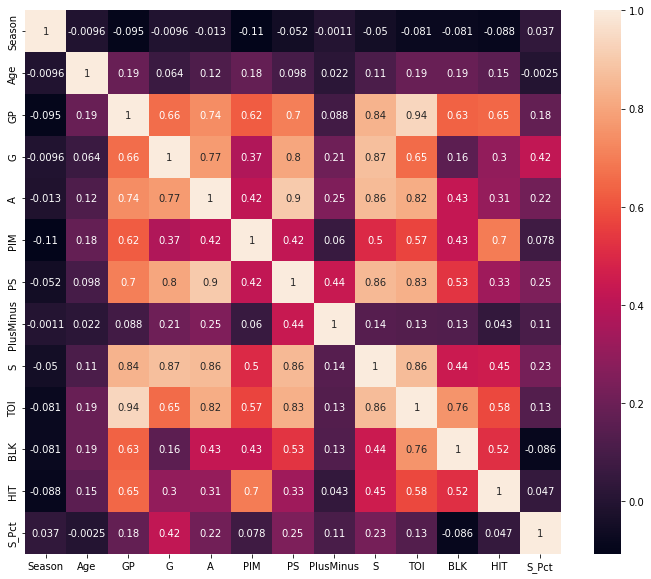

In [514]:
plt.figure(figsize=(12,10))
sns.heatmap(data[['Season','Age', 'Team_ID','Pos', 'GP',
       'G', 'A','PIM', 'PS', 'PlusMinus', 'S', 'TOI','BLK', 'HIT','S_Pct',]].corr(), annot=True)

In [610]:
data1 = data

In [611]:
data

,Season,Player_Name,Age,Team_ID,Team_Name,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA,S_Pct,S_PctTeamAvg
0,2015,Justin Abdelkader,27,DET,Detroit Red Wings,LW,71.0,23,21,44,72.0,5.6,3.0,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,1272.0,17:55,28.0,153.0,7.0,8.0,39.1,29.3,14.935065,Above
1,2015,Will Acton,27,EDM,Edmonton Oilers,C,3.0,0,0,0,5.0,-0.1,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32.0,10:43,3.0,3.0,4.0,4.0,0.5,0.7,0.000000,Below
2,2015,Luke Adam,24,CBJ,Columbus Blue Jackets,C,3.0,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,6:27,0.0,2.0,0.0,0.0,0.1,0.8,NaN,Below
3,2015,Craig Adams,37,PIT,Pittsburgh Penguins,RW,70.0,1,6,7,44.0,-0.3,-1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,682.0,9:45,29.0,183.0,17.0,23.0,14.6,18.0,1.960784,Below
4,2015,Andrew Agozzino,24,COL,Colorado Avalanche,LW,1.0,0,1,1,0.0,0.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.0,9:45,0.0,1.0,0.0,2.0,0.4,0.3,0.000000,Below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,2022,Mika Zibanejad,28,NYR,New York Rangers,C,81.0,29,52,81,12.0,9.2,30.0,13.0,15.0,1.0,3.0,35.0,13.0,4.0,219.0,1591.0,19:38,47.0,67.0,700.0,638.0,48.8,48.5,13.242009,Above
8415,2022,Radim Zohorna,25,PIT,Pittsburgh Penguins,F,17.0,2,4,6,4.0,0.9,12.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,176.0,10:20,3.0,23.0,4.0,8.0,7.1,5.2,22.222222,Above
8416,2022,Artem Zub,26,OTT,Ottawa Senators,D,81.0,6,16,22,60.0,4.9,1.0,6.0,0.0,0.0,0.0,16.0,0.0,0.0,92.0,1704.0,21:02,124.0,155.0,0.0,0.0,56.0,63.0,6.521739,Below
8417,2022,Mats Zuccarello,34,MIN,Minnesota Wild,LW,70.0,24,55,79,24.0,7.9,21.0,17.0,7.0,0.0,2.0,34.0,21.0,0.0,159.0,1301.0,18:35,33.0,36.0,21.0,34.0,49.7,41.8,15.094340,Above


In [612]:
data1 = pd.get_dummies(data1, columns=["Team_ID","Pos"])

In [613]:
data1

,Season,Player_Name,Age,Team_Name,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA,S_Pct,S_PctTeamAvg,Team_ID_ANA,Team_ID_ARI,Team_ID_BOS,Team_ID_BUF,Team_ID_CAR,Team_ID_CBJ,Team_ID_CGY,Team_ID_CHI,Team_ID_COL,Team_ID_DAL,Team_ID_DET,Team_ID_EDM,Team_ID_FLA,Team_ID_LAK,Team_ID_MIN,Team_ID_MTL,Team_ID_NJD,Team_ID_NSH,Team_ID_NYI,Team_ID_NYR,Team_ID_OTT,Team_ID_PHI,Team_ID_PIT,Team_ID_SEA,Team_ID_SJS,Team_ID_STL,Team_ID_TBL,Team_ID_TOR,Team_ID_VAN,Team_ID_VEG,Team_ID_WPG,Team_ID_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W
0,2015,Justin Abdelkader,27,Detroit Red Wings,71.0,23,21,44,72.0,5.6,3.0,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,1272.0,17:55,28.0,153.0,7.0,8.0,39.1,29.3,14.935065,Above,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2015,Will Acton,27,Edmonton Oilers,3.0,0,0,0,5.0,-0.1,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32.0,10:43,3.0,3.0,4.0,4.0,0.5,0.7,0.000000,Below,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2015,Luke Adam,24,Columbus Blue Jackets,3.0,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,6:27,0.0,2.0,0.0,0.0,0.1,0.8,NaN,Below,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2015,Craig Adams,37,Pittsburgh Penguins,70.0,1,6,7,44.0,-0.3,-1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,682.0,9:45,29.0,183.0,17.0,23.0,14.6,18.0,1.960784,Below,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2015,Andrew Agozzino,24,Colorado Avalanche,1.0,0,1,1,0.0,0.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.0,9:45,0.0,1.0,0.0,2.0,0.4,0.3,0.000000,Below,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,2022,Mika Zibanejad,28,New York Rangers,81.0,29,52,81,12.0,9.2,30.0,13.0,15.0,1.0,3.0,35.0,13.0,4.0,219.0,1591.0,19:38,47.0,67.0,700.0,638.0,48.8,48.5,13.242009,Above,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8415,2022,Radim Zohorna,25,Pittsburgh Penguins,17.0,2,4,6,4.0,0.9,12.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,176.0,10:20,3.0,23.0,4.0,8.0,7.1,5.2,22.222222,Above,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8416,2022,Artem Zub,26,Ottawa Senators,81.0,6,16,22,60.0,4.9,1.0,6.0,0.0,0.0,0.0,16.0,0.0,0.0,92.0,1704.0,21:02,124.0,155.0,0.0,0.0,56.0,63.0,6.521739,Below,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8417,2022,Mats Zuccarello,34,Minnesota Wild,70.0,24,55,79,24.0,7.9,21.0,17.0,7.0,0.0,2.0,34.0,21.0,0.0,159.0,1301.0,18:35,33.0,36.0,21.0,34.0,49.7,41.8,15.094340,Above,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [614]:
data1.fillna(0, inplace=True)

In [615]:
X = data1.drop(columns=["xGF", "xGA", "esG","ppG","shG","GWG","esA","ppA","shA","G","A","Player_Name","PTS", "Team_Name","S_PctTeamAvg"])
y = data1["PTS"].astype(int)

In [616]:
X[["T1","T2"]] = X["Avg_TOI"].str.split(":", expand=True)
X[["T1","T2"]] = X[["T1","T2"]].astype("int")
X["T1"] = X["T1"]*60
X["seconds"] = X["T1"] + X["T2"]
X = X.drop(columns=["Avg_TOI","T1","T2"])
X.dtypes

Season           int64
Age              int64
GP             float64
PIM            float64
PS             float64
PlusMinus      float64
S              float64
TOI            float64
BLK            float64
HIT            float64
FOW            float64
FOL            float64
S_Pct          float64
Team_ID_ANA      uint8
Team_ID_ARI      uint8
Team_ID_BOS      uint8
Team_ID_BUF      uint8
Team_ID_CAR      uint8
Team_ID_CBJ      uint8
Team_ID_CGY      uint8
Team_ID_CHI      uint8
Team_ID_COL      uint8
Team_ID_DAL      uint8
Team_ID_DET      uint8
Team_ID_EDM      uint8
Team_ID_FLA      uint8
Team_ID_LAK      uint8
Team_ID_MIN      uint8
Team_ID_MTL      uint8
Team_ID_NJD      uint8
Team_ID_NSH      uint8
Team_ID_NYI      uint8
Team_ID_NYR      uint8
Team_ID_OTT      uint8
Team_ID_PHI      uint8
Team_ID_PIT      uint8
Team_ID_SEA      uint8
Team_ID_SJS      uint8
Team_ID_STL      uint8
Team_ID_TBL      uint8
Team_ID_TOR      uint8
Team_ID_VAN      uint8
Team_ID_VEG      uint8
Team_ID_WPG

In [617]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [618]:
LR = LinearRegression()
LR.fit(xTrain, yTrain)

LinearRegression()

In [619]:
for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
    if i == "RMSE":
        print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,LR.predict(xTest)))))
    else:
        print("{} is: {}".format(i, i(yTest,LR.predict(xTest))))

<function r2_score at 0x0000020AD01E2320> is: 0.9639338073918705
<function mean_absolute_error at 0x0000020AD01E1EA0> is: 2.6987143487820897
<function mean_squared_error at 0x0000020AD01E2050> is: 14.352111505259213
RMSE is: 3.7884180742440785


In [620]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(max_depth=8)
RFR.fit(xTrain,yTrain)

RandomForestRegressor(max_depth=8)

In [621]:
for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
    if i == "RMSE":
        print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,RFR.predict(xTest)))))
    else:
        print("{} is: {}".format(i, i(yTest,RFR.predict(xTest))))

<function r2_score at 0x0000020AD01E2320> is: 0.9737448439443004
<function mean_absolute_error at 0x0000020AD01E1EA0> is: 2.0908506875753328
<function mean_squared_error at 0x0000020AD01E2050> is: 10.447926438856916
RMSE is: 3.2323252371716737


In [622]:
predicted = pd.DataFrame({"Actual":yTest,"Predicted":RFR.predict(xTest)})
predicted["AbsDiff"] = abs(predicted["Predicted"]-predicted["Actual"])
predicted.describe()

,Actual,Predicted,AbsDiff
count,1965.000000,1965.000000,1965.000000
mean,18.521628,18.610944,2.090851
std,19.953463,19.667939,2.465637
min,0.000000,0.058537,0.001129
25%,3.000000,2.810180,0.408340
50%,12.000000,12.505781,1.229806
75%,29.000000,29.132816,2.984291
max,115.000000,113.645781,28.667257


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

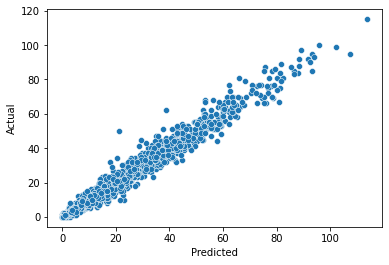

In [623]:
sns.scatterplot(x="Predicted",y="Actual",data=predicted)

In [625]:
from sklearn.model_selection import GridSearchCV
param_dic = {"max_depth":list(range(1,10))}
RFR2 = RandomForestRegressor()
GSCV = GridSearchCV(estimator=RFR2, param_grid=param_dic)

In [626]:
GSCV.fit(xTrain,yTrain)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [628]:
RFR3 = GSCV.best_estimator_

In [629]:
RFR3.fit(xTrain,yTrain)

RandomForestRegressor(max_depth=9)

In [630]:
for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
    if i == "RMSE":
        print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,RFR3.predict(xTest)))))
    else:
        print("{} is: {}".format(i, i(yTest,RFR3.predict(xTest))))

<function r2_score at 0x0000020AD01E2320> is: 0.9753166144434723
<function mean_absolute_error at 0x0000020AD01E1EA0> is: 2.000520968023242
<function mean_squared_error at 0x0000020AD01E2050> is: 9.82245910134522
RMSE is: 3.134080264024076


<AxesSubplot:>

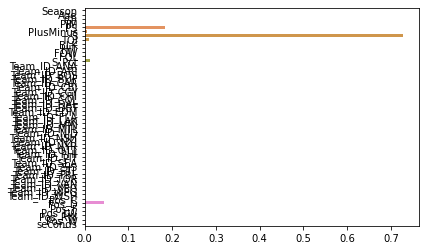

In [631]:
sns.barplot(x=RFR3.feature_importances_,y=RFR3.feature_names_in_)

In [535]:
ficurky =pd.DataFrame({"NameOfFeature":RFR3.feature_names_in_, "Values":RFR3.feature_importances_}).sort_values(by="Values", ascending=False)
ficurky.loc[:5,"NameOfFeature"].unique()

array(['S', 'PS', 'Pos_D', 'S_Pct', 'TOI', 'PlusMinus'], dtype=object)

In [633]:
predicted1 = pd.DataFrame({"Actual":yTest,"Predicted":RFR3.predict(xTest)})
predicted1

,Actual,Predicted
2222,9,9.565987
7424,1,1.210705
769,12,11.756427
758,34,27.533836
1448,1,1.269474
...,...,...
3292,89,81.246906
1165,0,0.071635
1657,1,1.069218
4975,10,11.246009


In [536]:
X2 = X[ficurky.loc[:5,"NameOfFeature"].unique()]
X2

,S,PS,Pos_D,S_Pct,TOI,PlusMinus
0,154.0,5.6,0,14.935065,1272.0,3.0
1,2.0,-0.1,0,0.000000,32.0,-2.0
2,0.0,0.0,0,0.000000,19.0,0.0
3,51.0,-0.3,0,1.960784,682.0,-1.0
4,1.0,0.1,0,0.000000,10.0,1.0
...,...,...,...,...,...,...
8414,219.0,9.2,0,13.242009,1591.0,30.0
8415,9.0,0.9,0,22.222222,176.0,12.0
8416,92.0,4.9,1,6.521739,1704.0,1.0
8417,159.0,7.9,0,15.094340,1301.0,21.0


In [537]:
xTrain,xTest,yTrain,yTest = train_test_split(X2,y)

In [538]:
RFR3 = GSCV.best_estimator_
RFR3.fit(xTrain,yTrain)

RandomForestRegressor(max_depth=9)

In [627]:
for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
    if i == "RMSE":
        print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,RFR3.predict(xTest)))))
    else:
        print("{} is: {}".format(i, i(yTest,RFR3.predict(xTest))))

c:\Kiki\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- BLK
- FOL
- FOW
- GP
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 52 features, but RandomForestRegressor is expecting 6 features as input.

In [557]:
X.columns

Index(['Season', 'Age', 'GP', 'PIM', 'PS', 'PlusMinus', 'S', 'TOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'S_Pct', 'Team_ID_ANA', 'Team_ID_ARI',
       'Team_ID_BOS', 'Team_ID_BUF', 'Team_ID_CAR', 'Team_ID_CBJ',
       'Team_ID_CGY', 'Team_ID_CHI', 'Team_ID_COL', 'Team_ID_DAL',
       'Team_ID_DET', 'Team_ID_EDM', 'Team_ID_FLA', 'Team_ID_LAK',
       'Team_ID_MIN', 'Team_ID_MTL', 'Team_ID_NJD', 'Team_ID_NSH',
       'Team_ID_NYI', 'Team_ID_NYR', 'Team_ID_OTT', 'Team_ID_PHI',
       'Team_ID_PIT', 'Team_ID_SEA', 'Team_ID_SJS', 'Team_ID_STL',
       'Team_ID_TBL', 'Team_ID_TOR', 'Team_ID_VAN', 'Team_ID_VEG',
       'Team_ID_WPG', 'Team_ID_WSH', 'Pos_C', 'Pos_D', 'Pos_F', 'Pos_LW',
       'Pos_RW', 'Pos_W', 'seconds'],
      dtype='object')

Feature Season
0.95 quantile = 2022.0
0.05 quantile = 2015.0
Average = 2018.5539009800177

Count of Upper outlier: 0
Count of Lower outlier: 0


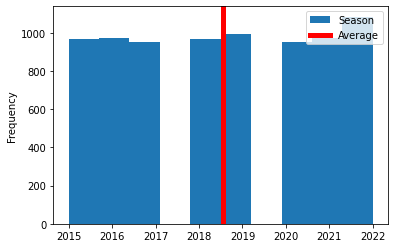

Feature Age
0.95 quantile = 34.0
0.05 quantile = 20.0
Average = 26.31436935217004

Count of Upper outlier: 41
Count of Lower outlier: 0


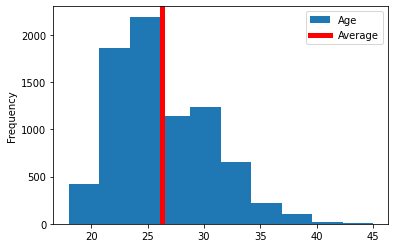

Feature GP
0.95 quantile = 82.0
0.05 quantile = 2.0
Average = 43.49242713503882

Count of Upper outlier: 0
Count of Lower outlier: 0


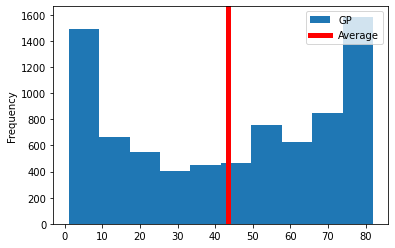

Feature PIM
0.95 quantile = 63.0
0.05 quantile = 0.0
Average = 20.847779050528192

Count of Upper outlier: 285
Count of Lower outlier: 0


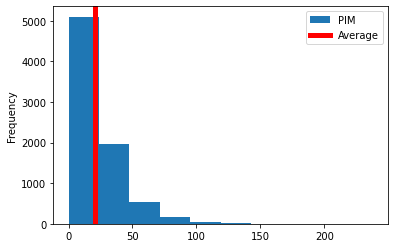

Feature PS
0.95 quantile = 7.7
0.05 quantile = -0.2
Average = 2.2131602392770775

Count of Upper outlier: 231
Count of Lower outlier: 0


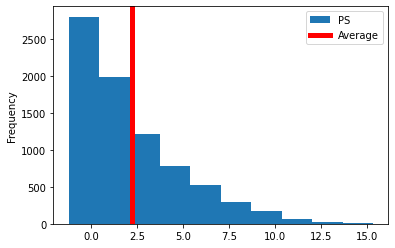

Feature PlusMinus
0.95 quantile = 17.0
0.05 quantile = -16.0
Average = -0.3829705994654448

Count of Upper outlier: 480
Count of Lower outlier: 306


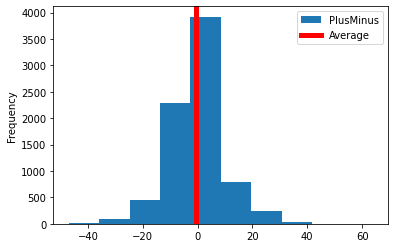

Feature S
0.95 quantile = 206.0
0.05 quantile = 1.0
Average = 74.47804505536465

Count of Upper outlier: 79
Count of Lower outlier: 0


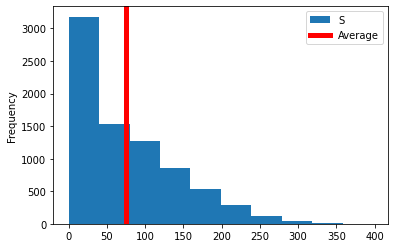

Feature TOI
0.95 quantile = 1635.0
0.05 quantile = 20.0
Average = 718.0232913325697

Count of Upper outlier: 0
Count of Lower outlier: 0


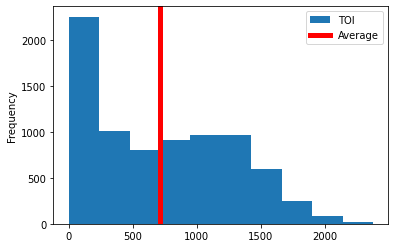

Feature BLK
0.95 quantile = 118.0
0.05 quantile = 0.0
Average = 33.941198930889655

Count of Upper outlier: 571
Count of Lower outlier: 0


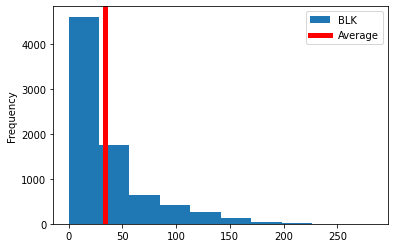

Feature HIT
0.95 quantile = 157.0
0.05 quantile = 1.0
Average = 54.640193458062875

Count of Upper outlier: 249
Count of Lower outlier: 0


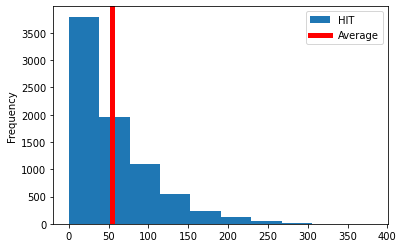

Feature FOW
0.95 quantile = 479.0
0.05 quantile = 0.0
Average = 71.2126765941199

Count of Upper outlier: 1493
Count of Lower outlier: 0


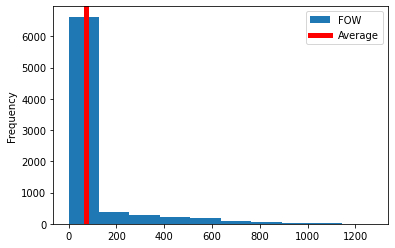

Feature FOL
0.95 quantile = 463.0
0.05 quantile = 0.0
Average = 71.21140384370625

Count of Upper outlier: 1460
Count of Lower outlier: 0


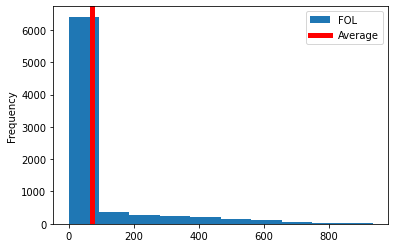

Feature S_Pct
0.95 quantile = 17.647058823529413
0.05 quantile = 0.0
Average = 7.5561533308005675

Count of Upper outlier: 97
Count of Lower outlier: 0


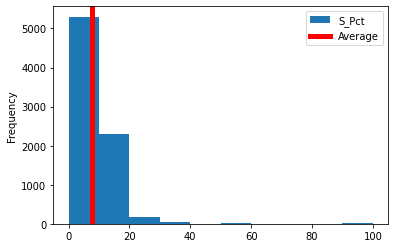

In [559]:
for i in ['Season', 'Age', 'GP', 'PIM', 'PS', 'PlusMinus', 'S', 'TOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'S_Pct']:
    print("Feature {}\n0.95 quantile = {}\n0.05 quantile = {}\nAverage = {}\n".format(i, X[i].quantile(0.95),X[i].quantile(0.05),X[i].mean()))
    q3 = X[i].quantile(0.75)
    q1 = X[i].quantile(0.25)
    iqr = q3 - q1
    uplimit = q3+(1.5*iqr)
    lowlimit = q1-(1.5*iqr)
    print("Count of Upper outlier: {}".format(len(X[i][X[i] > uplimit])))
    print("Count of Lower outlier: {}".format(len(X[i][X[i] < lowlimit])))
    X[i].plot(kind="hist")
    plt.axvline(X[i].mean(), color="red",linewidth=5,label="Average")
    plt.legend()
    plt.show()

In [586]:
from sklearn.preprocessing import StandardScaler
X5 = X
xTrain, xTest, yTrain, yTest = train_test_split(X5, y)

In [571]:
STC = StandardScaler()
xTrain = STC.fit_transform(xTrain)
xTrain = pd.DataFrame(xTrain, columns=X.columns)
xTest = STC.transform(xTest)
xTest = pd.DataFrame(xTest, columns=X.columns)

In [573]:
RFR5 = RandomForestRegressor()
RFR5.fit(xTrain,yTrain)

RandomForestRegressor()

In [574]:
for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
    if i == "RMSE":
        print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,RFR5.predict(xTest)))))
    else:
        print("{} is: {}".format(i, i(yTest,RFR5.predict(xTest))))

<function r2_score at 0x0000020AD01E2320> is: 0.9748080645552353
<function mean_absolute_error at 0x0000020AD01E1EA0> is: 1.9488498727735368
<function mean_squared_error at 0x0000020AD01E2050> is: 9.55701134860051
RMSE is: 3.0914416294991742


In [576]:
from sklearn.preprocessing import MinMaxScaler
X6 = X[['Season', 'Age', 'GP', 'PIM', 'PS', 'PlusMinus', 'S', 'TOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'S_Pct']]
xTrain, xTest, yTrain, yTest = train_test_split(X6, y)

In [577]:
MMS = MinMaxScaler()
xTrain = MMS.fit_transform(xTrain)
xTrain = pd.DataFrame(xTrain, columns=X.columns)
xTest = MMS.transform(xTest)
xTest = pd.DataFrame(xTest, columns=X.columns)

In [578]:
RFR6 = RandomForestRegressor()
RFR6.fit(xTrain,yTrain)

RandomForestRegressor()

In [579]:
for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
    if i == "RMSE":
        print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,RFR5.predict(xTest)))))
    else:
        print("{} is: {}".format(i, i(yTest,RFR5.predict(xTest))))

<function r2_score at 0x0000020AD01E2320> is: 0.15253083814720003
<function mean_absolute_error at 0x0000020AD01E1EA0> is: 16.299669211195926
<function mean_squared_error at 0x0000020AD01E2050> is: 344.68982315521623
RMSE is: 18.565824063456386


In [601]:
# X["S_Pct"].fillna(0,inplace=True)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# X7 = X
# xTrain, xTest, yTrain, yTest = train_test_split(X7, y)

In [606]:
# PF = PolynomialFeatures()
# xTrain = PF.fit_transform(xTrain)
# xTest = PF.transform(xTest)

In [ ]:
# for i in [r2_score, mean_absolute_error, mean_squared_error, "RMSE"]:
#     if i == "RMSE":
#         print("{} is: {}".format(i, sqrt(mean_squared_error(yTest,RFR5.predict(xTest)))))
#     else:
#         print("{} is: {}".format(i, i(yTest,RFR5.predict(xTest))))

In [636]:
predicted1

,Actual,Predicted
2222,9,9.565987
7424,1,1.210705
769,12,11.756427
758,34,27.533836
1448,1,1.269474
...,...,...
3292,89,81.246906
1165,0,0.071635
1657,1,1.069218
4975,10,11.246009


In [641]:
merged = pd.merge(left=data,right=predicted1,left_index=True,right_index=True,how="inner")
merged.head(5)

,Season,Player_Name,Age,Team_ID,Team_Name,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA,S_Pct,S_PctTeamAvg,Actual,Predicted
9,2015,Conor Allen,25,NYR,New York Rangers,D,4.0,0,0,0,4.0,-0.1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,12:12,0.0,6.0,0.0,0.0,2.0,1.4,0.000000,Below,0,0.199942
13,2015,Josh Anderson,20,CBJ,Columbus Blue Jackets,RW,6.0,0,1,1,2.0,-0.1,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,81.0,13:27,2.0,24.0,0.0,0.0,2.2,3.4,0.000000,Below,1,0.372314
17,2015,Artem Anisimov,26,CBJ,Columbus Blue Jackets,C,52.0,7,20,27,8.0,2.0,-6.0,7.0,0.0,0.0,2.0,13.0,4.0,3.0,88.0,852.0,16:23,26.0,33.0,102.0,127.0,27.4,29.1,7.954545,Above,27,22.708451
36,2015,Josh Bailey,25,NYI,New York Islanders,LW,70.0,15,26,41,12.0,4.3,3.0,13.0,2.0,0.0,1.0,24.0,2.0,0.0,140.0,1175.0,16:47,36.0,66.0,30.0,36.0,63.0,48.7,10.714286,Above,41,39.427147
47,2015,Taylor Beck,23,NSH,Nashville Predators,LW,62.0,8,8,16,18.0,1.2,-4.0,6.0,2.0,0.0,3.0,8.0,0.0,0.0,78.0,740.0,11:56,23.0,61.0,5.0,5.0,19.0,22.6,10.256410,Above,16,17.025612


In [700]:
merged.sort_values(by="Actual",ascending=False).head(10)

,Season,Player_Name,Age,Team_ID,Team_Name,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA,S_Pct,S_PctTeamAvg,Actual,Predicted
7622,2022,Johnny Gaudreau,28,CGY,Calgary Flames,LW,82.0,40,75,115,26.0,14.6,64.0,34.0,6.0,0.0,9.0,56.0,19.0,0.0,262.0,1523.0,18:34,9.0,10.0,1.0,0.0,71.2,44.3,15.267176,Above,115,114.245350
4768,2019,Brad Marchand,30,BOS,Boston Bruins,LW,79.0,36,64,100,96.0,11.7,15.0,23.0,10.0,3.0,9.0,36.0,24.0,4.0,231.0,1550.0,19:37,19.0,46.0,45.0,60.0,53.5,48.4,15.584416,Above,100,96.874024
4755,2019,Nathan MacKinnon,23,COL,Colorado Avalanche,C,82.0,41,58,99,34.0,11.8,20.0,29.0,12.0,0.0,6.0,33.0,25.0,0.0,365.0,1812.0,22:05,31.0,54.0,518.0,666.0,73.7,62.2,11.232877,Above,99,102.195246
5834,2020,Connor McDavid,23,EDM,Edmonton Oilers,C,64.0,34,63,97,28.0,10.9,-6.0,23.0,11.0,0.0,6.0,31.0,32.0,0.0,212.0,1399.0,21:52,18.0,37.0,320.0,350.0,54.9,52.3,16.037736,Above,97,90.229104
5925,2020,David Pastrnak,23,BOS,Boston Bruins,RW,70.0,48,47,95,40.0,13.2,21.0,28.0,20.0,0.0,10.0,29.0,18.0,0.0,279.0,1327.0,18:58,22.0,47.0,7.0,11.0,45.2,36.7,17.204301,Above,95,107.001439
5920,2020,Artemi Panarin,28,NYR,New York Rangers,LW,69.0,32,63,95,20.0,11.4,36.0,25.0,7.0,0.0,4.0,46.0,17.0,0.0,209.0,1422.0,20:36,18.0,25.0,1.0,1.0,57.8,47.8,15.311005,Above,95,94.582086
3474,2018,Taylor Hall,26,NJD,New Jersey Devils,LW,76.0,39,54,93,34.0,12.2,14.0,25.0,13.0,1.0,7.0,30.0,24.0,0.0,278.0,1455.0,19:09,44.0,72.0,72.0,76.0,57.6,48.6,14.028777,Above,93,92.292790
4932,2019,Brayden Point,22,TBL,Tampa Bay Lightning,C,79.0,41,51,92,28.0,11.4,27.0,21.0,20.0,0.0,7.0,36.0,15.0,0.0,191.0,1495.0,18:55,43.0,31.0,435.0,421.0,62.2,57.9,21.465969,Above,92,89.464958
8138,2022,Mikko Rantanen,25,COL,Colorado Avalanche,RW,75.0,36,56,92,56.0,10.5,35.0,20.0,16.0,0.0,2.0,37.0,19.0,0.0,254.0,1573.0,20:58,43.0,58.0,164.0,190.0,61.3,52.6,14.173228,Above,92,88.699807
8060,2022,Alex Ovechkin,36,WSH,Washington Capitals,LW,77.0,50,40,90,18.0,11.3,8.0,33.0,16.0,1.0,5.0,27.0,13.0,0.0,334.0,1584.0,20:34,25.0,156.0,4.0,9.0,51.8,51.7,14.970060,Above,90,90.835696


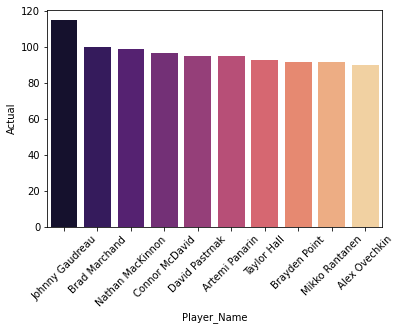

In [650]:
sns.barplot(x="Player_Name",y="Actual",data=merged.sort_values(by="Actual",ascending=False).head(10), palette="magma")
plt.xticks(rotation=45)
plt.show()

In [679]:
names = merged["Player_Name"].loc[[7622, 4768, 4755, 5834, 5925, 5920, 3474, 4932, 8138, 8060]].values

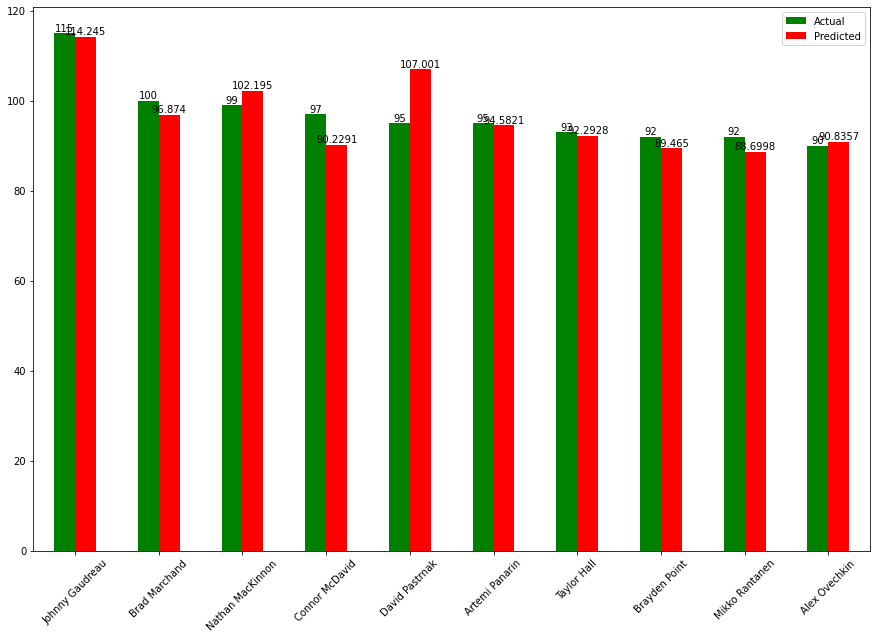

In [699]:
hz = merged[["Actual", "Predicted"]].sort_values(by="Actual",ascending=False).head(10).plot(kind="bar", color=["green","red"], figsize=(15,10))
locs, labels=plt.xticks()
plt.xticks(locs, names,rotation=45)
hz.bar_label(hz.containers[0])
hz.bar_label(hz.containers[1])
plt.show()